In [ ]:
# Install gdown if not already installed
!pip install --quiet gdown

# Download the file using gdown with the file ID
file_id = '1R5P_GMBJCwp8pOfB5365RB5pOUjMy_fx'
!gdown --id $file_id -O dataset.csv



/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1R5P_GMBJCwp8pOfB5365RB5pOUjMy_fx
From (redirected): https://drive.google.com/uc?id=1R5P_GMBJCwp8pOfB5365RB5pOUjMy_fx&confirm=t&uuid=92ccfa56-39f5-449d-8a91-b5157767796b
To: /content/dataset.csv
100% 7.33G/7.33G [01:19<00:00, 91.8MB/s]


In [ ]:
import pandas as pd

# Use engine='python' and on_bad_lines='skip' to skip bad rows
df = pd.read_csv('/content/dataset.csv', engine='python', on_bad_lines='skip')

print(f"Dataset loaded with shape: {df.shape}")
print(df.head())


Dataset loaded with shape: (8284254, 80)
  Dst Port Protocol            Timestamp Flow Duration Tot Fwd Pkts  \
0        0        0  14/02/2018 08:31:01     112641719            3   
1        0        0  14/02/2018 08:33:50     112641466            3   
2        0        0  14/02/2018 08:36:39     112638623            3   
3       22        6  14/02/2018 08:40:13       6453966           15   
4       22        6  14/02/2018 08:40:23       8804066           14   

  Tot Bwd Pkts TotLen Fwd Pkts TotLen Bwd Pkts Fwd Pkt Len Max  \
0            0               0               0               0   
1            0               0               0               0   
2            0               0               0               0   
3           10            1239            2273             744   
4           11            1143            2209             744   

  Fwd Pkt Len Min  ... Fwd Seg Size Min Active Mean Active Std Active Max  \
0               0  ...                0         0.0       

In [ ]:
pip install pandas matplotlib seaborn


In [ ]:
chunks = pd.read_csv('/content/dataset.csv', engine='python', chunksize=100000, on_bad_lines='skip')
df = pd.concat(chunks, ignore_index=True)
print(f"Dataset loaded in chunks with shape: {df.shape}")


Dataset loaded in chunks with shape: (8284254, 80)


Processing chunk 1 with shape (1000000, 80)
Processing chunk 2 with shape (1000000, 80)
Processing chunk 3 with shape (1000000, 80)
Processing chunk 4 with shape (145725, 80)
Processing chunk 5 with shape (0, 80)
Processing chunk 6 with shape (0, 80)
Processing chunk 7 with shape (0, 80)
Processing chunk 8 with shape (0, 80)
Processing chunk 9 with shape (0, 80)
Processing chunk 10 with shape (0, 80)
Processing chunk 11 with shape (0, 80)
Processing chunk 12 with shape (905527, 80)
Processing chunk 13 with shape (1000000, 80)
Processing chunk 14 with shape (1000000, 80)
Processing chunk 15 with shape (1000000, 80)
Processing chunk 16 with shape (1000000, 80)
Processing chunk 17 with shape (233002, 80)
Combined dataset shape: (8284254, 79)


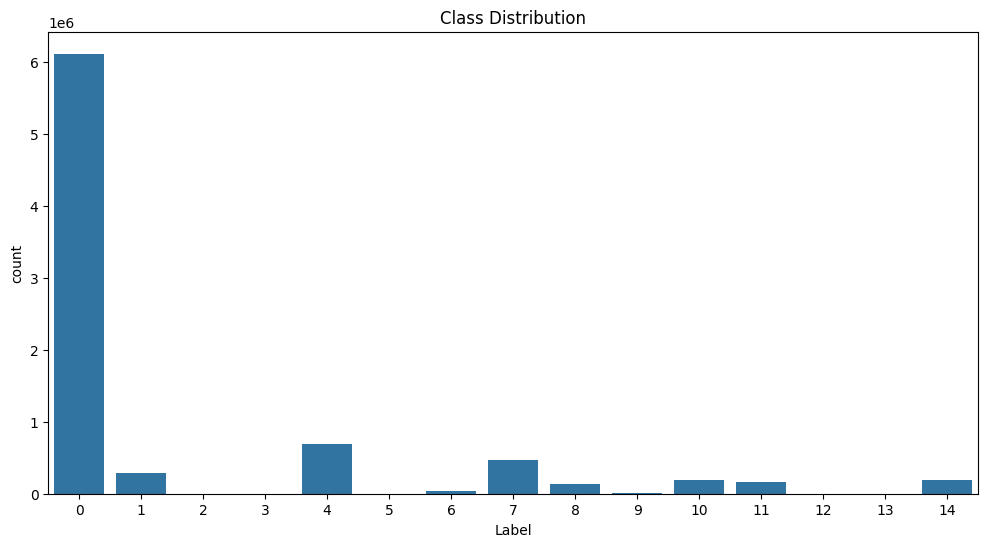

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load dataset in chunks and process incrementally
def load_and_process_chunks(filepath, chunksize=1_000_000):
    chunks_list = []
    for i, chunk in enumerate(pd.read_csv(filepath, engine='python', chunksize=chunksize, on_bad_lines='skip')):
        print(f"Processing chunk {i+1} with shape {chunk.shape}")

        # Drop 'Timestamp' if present
        if 'Timestamp' in chunk.columns:
            chunk = chunk.drop(columns=['Timestamp'])

        # Convert all object columns except 'Label' to numeric, coercing errors
        object_cols = chunk.select_dtypes(include=['object']).columns.tolist()
        if 'Label' in object_cols:
            object_cols.remove('Label')
        for col in object_cols:
            chunk[col] = pd.to_numeric(chunk[col], errors='coerce')

        # Fill missing values
        chunk = chunk.fillna(0)

        chunks_list.append(chunk)
    full_df = pd.concat(chunks_list, ignore_index=True)
    return full_df

# Load full dataset with incremental processing
df = load_and_process_chunks('/content/dataset.csv')

print(f"Combined dataset shape: {df.shape}")

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

# Quick class distribution plot
plt.figure(figsize=(12,6))
sns.countplot(x='Label', data=df)
plt.title("Class Distribution")
plt.show()


In [ ]:
# Get all unique classes/labels
unique_labels = df['Label'].unique()

# Print the sorted list of labels
print(sorted(unique_labels))


[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14)]


In [ ]:
label_mapping = {
    0: 'Benign',
    1: 'Bot',
    2: 'Brute Force -Web',
    3: 'Brute Force -XSS',
    4: 'DDOS attack-HOIC',
    5: 'DDOS attack-LOIC-UDP',
    6: 'DoS attacks-GoldenEye',
    7: 'DoS attacks-Hulk',
    8: 'DoS attacks-SlowHTTPTest',
    9: 'DoS attacks-Slowloris',
    10: 'FTP-BruteForce',
    11: 'Infilteration',
    12: 'Label',
    13: 'SQL Injection',
    14: 'SSH-Bruteforce'
}

for label_id in sorted(unique_labels):
    print(f"{label_id}: {label_mapping.get(label_id, 'Unknown')}")


0: Benign
1: Bot
2: Brute Force -Web
3: Brute Force -XSS
4: DDOS attack-HOIC
5: DDOS attack-LOIC-UDP
6: DoS attacks-GoldenEye
7: DoS attacks-Hulk
8: DoS attacks-SlowHTTPTest
9: DoS attacks-Slowloris
10: FTP-BruteForce
11: Infilteration
12: Label
13: SQL Injection
14: SSH-Bruteforce


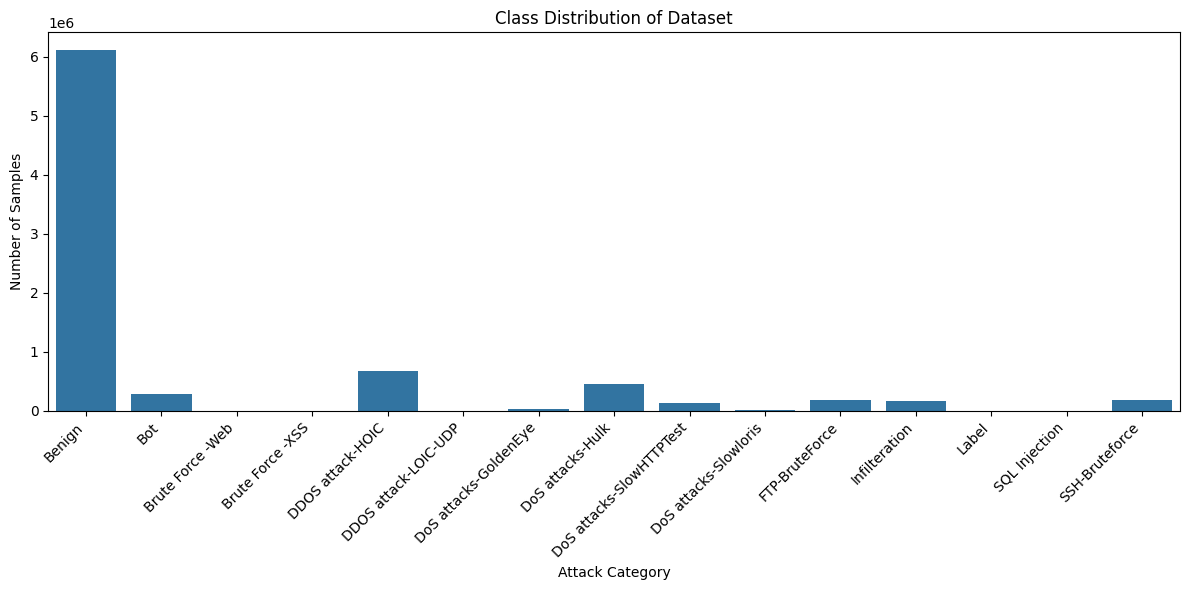

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and 'Label' is the label column (numeric)
# And label_mapping is the dictionary mapping numeric labels to names as provided

# Count occurrences of each class
label_counts = df['Label'].value_counts().sort_index()

# Map numeric labels to names for plotting
label_names = [label_mapping.get(i, str(i)) for i in label_counts.index]

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=label_names, y=label_counts.values)

plt.title("Class Distribution of Dataset")
plt.xlabel("Attack Category")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


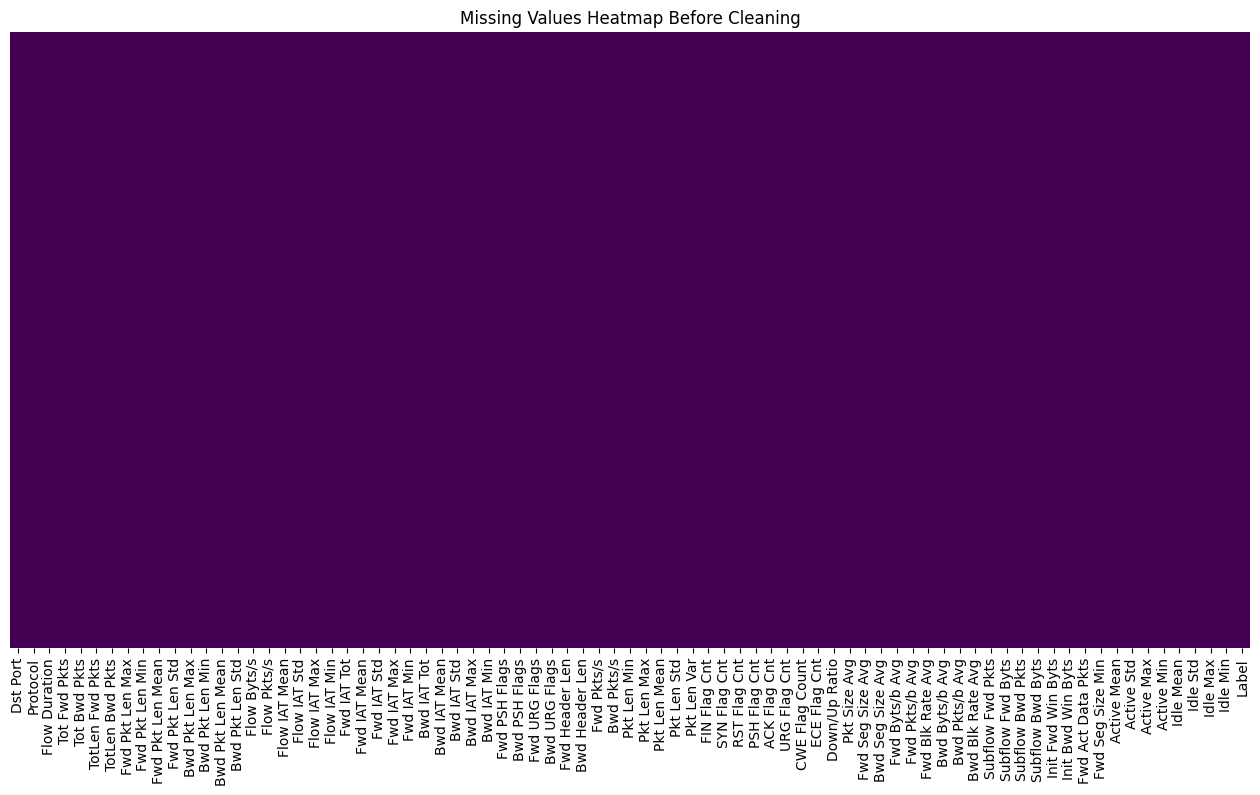

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap Before Cleaning')
plt.show()


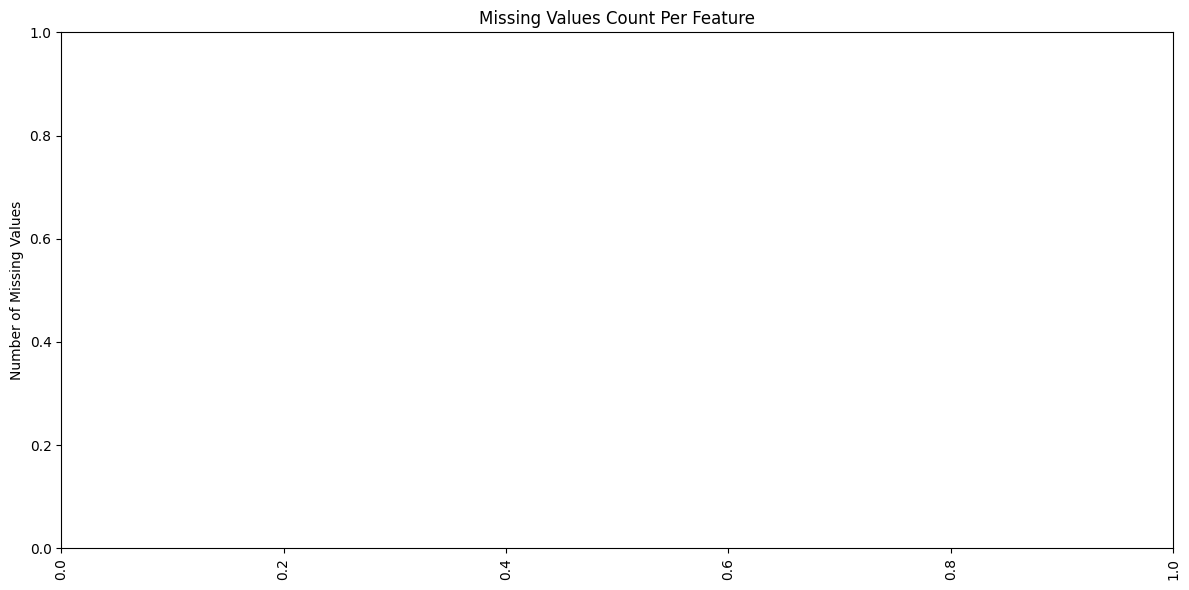

In [ ]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=90)
plt.title('Missing Values Count Per Feature')
plt.ylabel('Number of Missing Values')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

chunks = []
chunk_size = 10**6  # 1 million rows per chunk

for chunk in pd.read_csv('/content/dataset.csv', chunksize=chunk_size, on_bad_lines='skip'):
    chunks.append(chunk)

df_before_cleaning = pd.concat(chunks, ignore_index=True)
print("Dataset loaded in chunks with shape:", df_before_cleaning.shape)


<ipython-input-1-6d57652634a6>:6: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('/content/dataset.csv', chunksize=chunk_size, on_bad_lines='skip'):
<ipython-input-1-6d57652634a6>:6: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('/content/dataset.csv', chunksize=chunk_size, on_bad_lines='skip'):
<ipython-input-1-6d57652634a6>:6: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,

Dataset loaded in chunks with shape: (8284254, 80)


In [ ]:
df_after_cleaning = df_before_cleaning.copy()

# Example: Drop problematic columns like 'Timestamp'
df_after_cleaning.drop(columns=['Timestamp'], inplace=True, errors='ignore')

# Convert numeric columns to numeric type (coerce errors to NaN)
for col in df_after_cleaning.columns:
    if col != 'Label':  # skip label
        df_after_cleaning[col] = pd.to_numeric(df_after_cleaning[col], errors='coerce')

# Fill NaN
df_after_cleaning.fillna(0, inplace=True)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


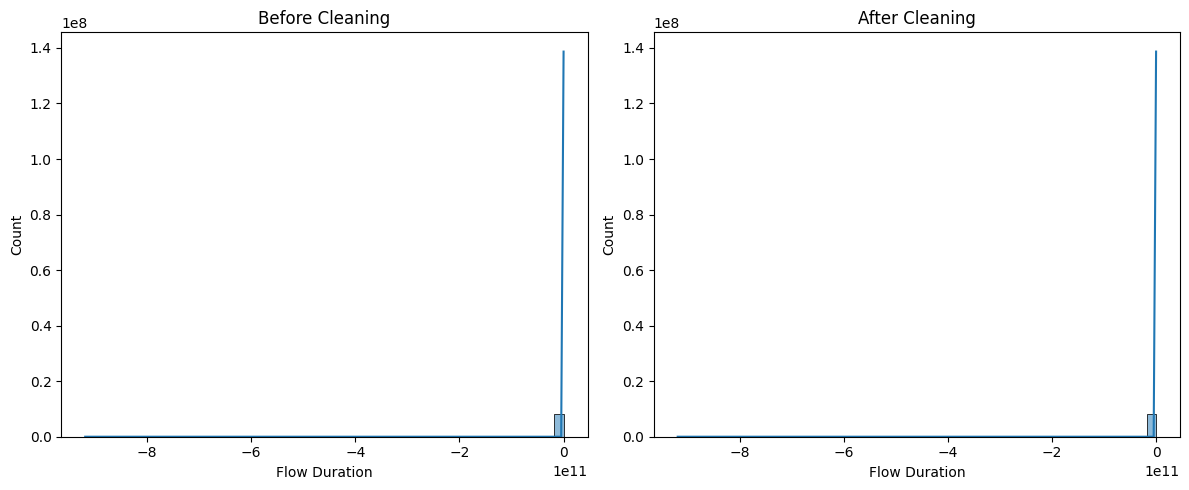

In [ ]:
# Filter out repeated header rows accidentally loaded inside data
df_before_cleaning = df_before_cleaning[df_before_cleaning['Flow Duration'] != 'Flow Duration']

# Convert column to numeric
df_before_cleaning['Flow Duration'] = pd.to_numeric(df_before_cleaning['Flow Duration'], errors='coerce')

# Similarly for cleaned dataset df_after_cleaning if needed
df_after_cleaning = df_before_cleaning.copy()
df_after_cleaning.fillna(0, inplace=True)  # example cleaning

# Plotting
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_before_cleaning['Flow Duration'].dropna(), bins=50, kde=True)
plt.title('Before Cleaning')

plt.subplot(1,2,2)
sns.histplot(df_after_cleaning['Flow Duration'].dropna(), bins=50, kde=True)
plt.title('After Cleaning')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Load CSV in chunks, skip bad lines
chunks = []
chunk_size = 1_000_000

print("Loading data in chunks...")
for i, chunk in enumerate(pd.read_csv('/content/dataset.csv', chunksize=chunk_size, on_bad_lines='skip')):
    print(f"Chunk {i+1} loaded with shape: {chunk.shape}")
    chunks.append(chunk)

# Step 2: Combine chunks into one DataFrame
df = pd.concat(chunks, ignore_index=True)
print(f"Combined dataset shape: {df.shape}")

# Step 3: Drop unnecessary columns like 'Timestamp'
if 'Timestamp' in df.columns:
    df.drop(columns=['Timestamp'], inplace=True)

# Step 4: Handle missing/infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Step 5: Encode categorical labels if needed (example)
if df['Label'].dtype == object:
    df['Label_encoded'] = df['Label'].astype('category').cat.codes

# Step 6: Split into features and target
X = df.drop(columns=['Label', 'Label_encoded'], errors='ignore')
y = df['Label_encoded'] if 'Label_encoded' in df.columns else df['Label']

# Step 7: Confirm data types and convert features to numeric if needed
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

print("Data ready for modeling.")
print(X.shape, y.shape)
print(y.value_counts())

# Now you can do train/val/test split and model training as usual


Loading data in chunks...
Chunk 1 loaded with shape: (1000000, 80)
Chunk 2 loaded with shape: (1000000, 80)
Chunk 3 loaded with shape: (1000000, 80)


<ipython-input-9-3b995d059adf>:9: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv('/content/dataset.csv', chunksize=chunk_size, on_bad_lines='skip')):


Chunk 4 loaded with shape: (1000000, 80)
Chunk 5 loaded with shape: (1000000, 80)
Chunk 6 loaded with shape: (1000000, 80)


<ipython-input-9-3b995d059adf>:9: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv('/content/dataset.csv', chunksize=chunk_size, on_bad_lines='skip')):


Chunk 7 loaded with shape: (1000000, 80)


<ipython-input-9-3b995d059adf>:9: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv('/content/dataset.csv', chunksize=chunk_size, on_bad_lines='skip')):


Chunk 8 loaded with shape: (1000000, 80)
Chunk 9 loaded with shape: (284254, 80)
Combined dataset shape: (8284254, 80)
Data ready for modeling.
(8284254, 78) (8284254,)
Label_encoded
0     6112151
4      686012
7      461912
1      286191
10     193360
14     187589
11     161934
8      139890
6       41508
9       10990
5        1730
2         611
3         230
13         87
12         59
Name: count, dtype: int64


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with zero (or use median or mean)
X.fillna(0, inplace=True)

# Optionally clip values to a maximum threshold to avoid huge values
max_threshold = 1e10
X = X.clip(upper=max_threshold)

# Now apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
import numpy as np

# Check if any infinities present
print("Number of positive infinity values:", np.isposinf(X).sum().sum())
print("Number of negative infinity values:", np.isneginf(X).sum().sum())

# Replace inf/-inf with NaN again (just in case)
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check again for NaNs
print("Number of NaN values:", X.isna().sum().sum())

# Fill NaNs (use median to be robust)
X = X.fillna(X.median())

# Clip extreme values to a reasonable range to avoid float64 overflow
max_val = 1e10
X = X.clip(upper=max_val, lower=-max_val)

# Verify no inf or NaN remain
print("Number of positive infinity after cleaning:", np.isposinf(X).sum().sum())
print("Number of negative infinity after cleaning:", np.isneginf(X).sum().sum())
print("Number of NaNs after cleaning:", X.isna().sum().sum())

# Now scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Number of positive infinity values: 0
Number of negative infinity values: 0
Number of NaN values: 0
Number of positive infinity after cleaning: 0
Number of negative infinity after cleaning: 0
Number of NaNs after cleaning: 0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaling completed. Shape:", X_scaled.shape)


Scaling completed. Shape: (8284254, 78)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Split temp into validation (15%) and test (15%)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_valid.shape, y_valid.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (5798977, 78) (5798977,)
Validation shape: (1242638, 78) (1242638,)
Test shape: (1242639, 78) (1242639,)


DL MODELS

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have your datasets ready:
# X_train, y_train, X_valid, y_valid, X_test, y_test
# All X_* are numpy arrays of shape (samples, features)
# y_* are encoded label arrays (integers)

# Reshape X data for LSTM: (samples, timesteps=features, features=1)
X_train_lstm = np.expand_dims(X_train, axis=2)
X_valid_lstm = np.expand_dims(X_valid, axis=2)
X_test_lstm = np.expand_dims(X_test, axis=2)

num_classes = len(np.unique(y_train))  # Number of classes

# Build the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], 1), return_sequences=False),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_lstm, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_valid_lstm, y_valid)
)

# Predict on validation set
y_pred_val = model.predict(X_valid_lstm).argmax(axis=1)
print("Validation Accuracy:", accuracy_score(y_valid, y_pred_val))
print("Validation Classification Report:\n", classification_report(y_valid, y_pred_val))

# Predict on test set
y_pred_test = model.predict(X_test_lstm).argmax(axis=1)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
90610/90610 ━━━━━━━━━━━━━━━━━━━━ 579s 6ms/step - accuracy: 0.9455 - loss: 0.1895 - val_accuracy: 0.9669 - val_loss: 0.0999
Epoch 2/10
90610/90610 ━━━━━━━━━━━━━━━━━━━━ 574s 6ms/step - accuracy: 0.9673 - loss: 0.1008 - val_accuracy: 0.9681 - val_loss: 0.0975
Epoch 3/10
90610/90610 ━━━━━━━━━━━━━━━━━━━━ 576s 6ms/step - accuracy: 0.9678 - loss: 0.0983 - val_accuracy: 0.9688 - val_loss: 0.0950
Epoch 4/10
90610/90610 ━━━━━━━━━━━━━━━━━━━━ 577s 6ms/step - accuracy: 0.9685 - loss: 0.0966 - val_accuracy: 0.9689 - val_loss: 0.0944
Epoch 5/10
90610/90610 ━━━━━━━━━━━━━━━━━━━━ 577s 6ms/step - accuracy: 0.9687 - loss: 0.0958 - val_accuracy: 0.9686 - val_loss: 0.0952
Epoch 6/10
90610/90610 ━━━━━━━━━━━━━━━━━━━━ 579s 6ms/step - accuracy: 0.9687 - loss: 0.0953 - val_accuracy: 0.9681 - val_loss: 0.0945
Epoch 7/10
90610/90610 ━━━━━━━━━━━━━━━━━━━━ 584s 6ms/step - accuracy: 0.9687 - loss: 0.0947 - val_accuracy: 0.9691 - val_loss: 0.0929
Epoch 8/10
90610/90610 ━━━━━━━━━━━━━━━━━━━━ 586s 6ms/step - ac

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99    916823
           1       1.00      1.00      1.00     42928
           2       1.00      0.38      0.55        92
           3       1.00      0.57      0.73        35
           4       1.00      1.00      1.00    102902
           5       1.00      0.99      1.00       260
           6       0.99      0.99      0.99      6226
           7       1.00      1.00      1.00     69287
           8       0.77      0.50      0.60     20983
           9       0.98      0.99      0.99      1648
          10       0.71      0.89      0.79     29004
          11       0.50      0.01      0.01     24290
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00        13
          14       1.00      1.00      1.00     28138

    accuracy                           0.97   1242638
   macro avg       0.80      0.69      0.71  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99    916823
           1       1.00      1.00      1.00     42929
           2       1.00      0.30      0.46        91
           3       1.00      0.47      0.64        34
           4       1.00      1.00      1.00    102902
           5       1.00      0.98      0.99       259
           6       1.00      0.99      1.00      6226
           7       1.00      1.00      1.00     69287
           8       0.77      0.50      0.61     20984
           9       0.98      0.99      0.99      1649
          10       0.71      0.89      0.79     29004
          11       0.45      0.01      0.01     24290
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00        13
          14       1.00      1.00      1.00     28139

    accuracy                           0.97   1242639
   macro avg       0.79      0.68      0.70   12426

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1200x1200 with 0 Axes>

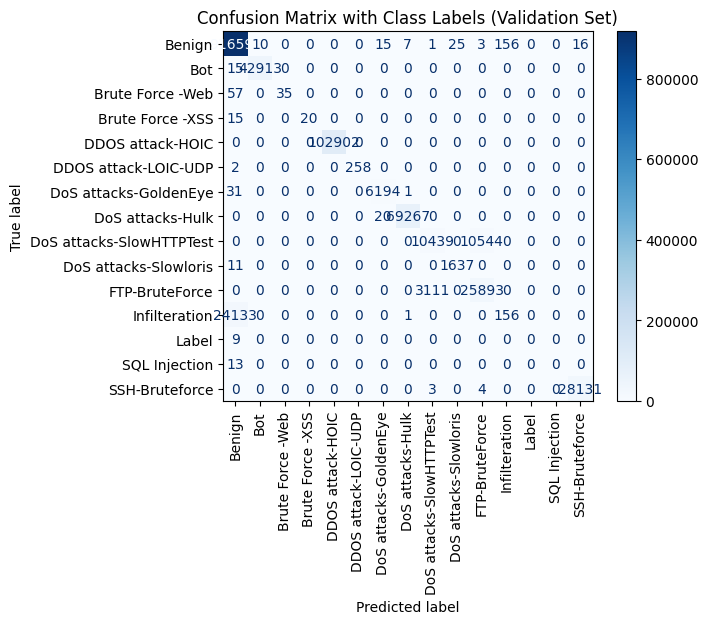

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you want to plot the confusion matrix for the validation set:
y_true = y_valid        # Use the true validation labels
y_pred = y_pred_val     # Use the predicted validation labels

# Assuming label_names is a list of class names in the correct order
# It seems 'label_names' was defined in a previous cell and is available in globals.

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix with labels
# Use the global label_names variable which seems to be defined elsewhere
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)

plt.figure(figsize=(12, 12))
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='d')
plt.title('Confusion Matrix with Class Labels (Validation Set)') # Added validation set to title
plt.show()

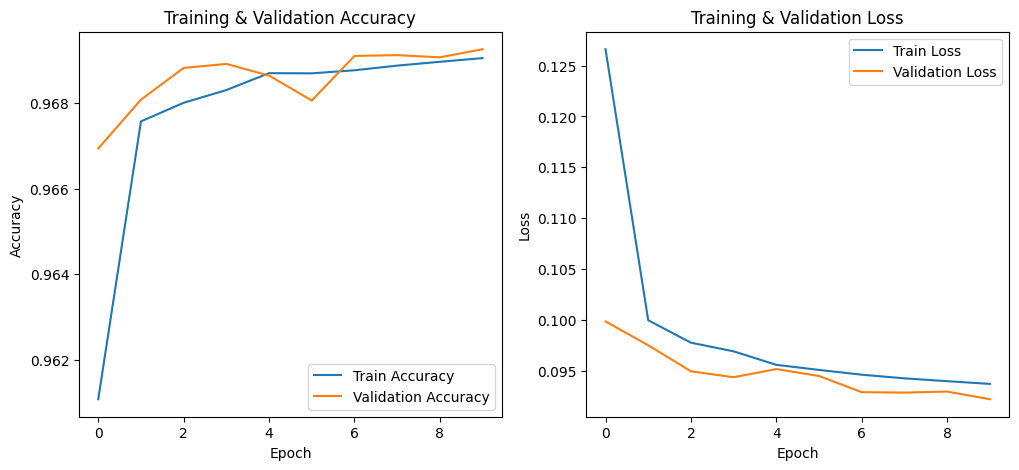

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


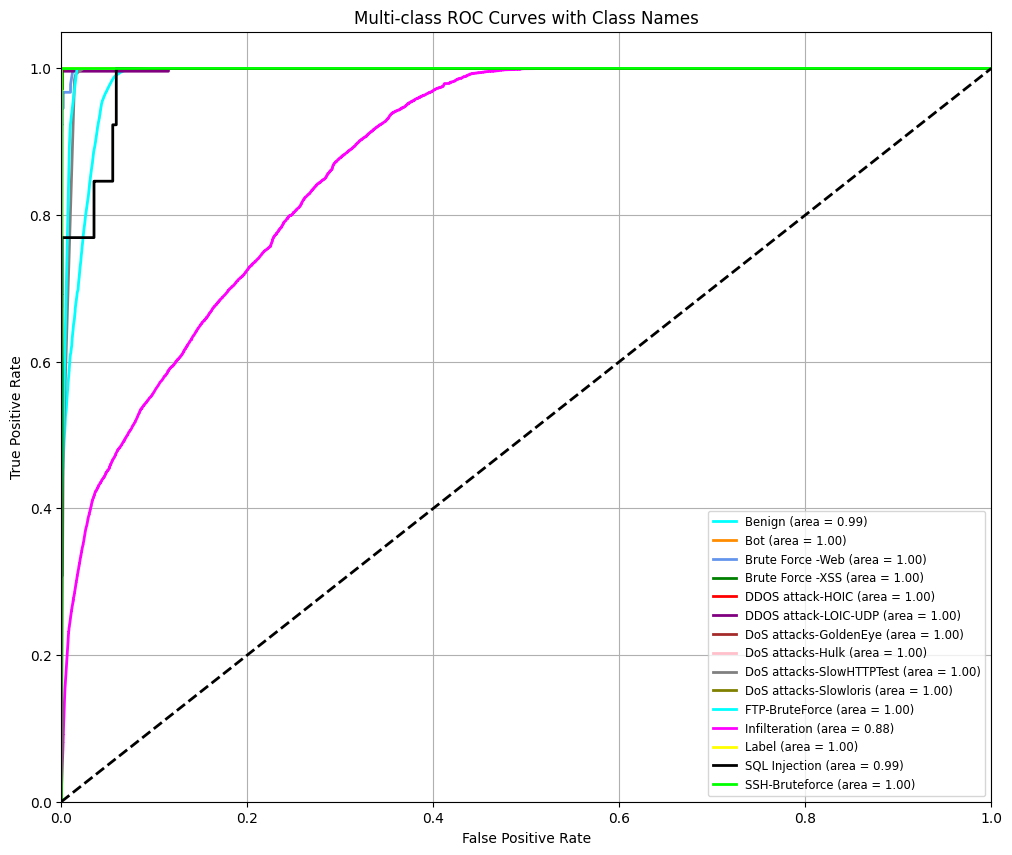

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Assuming:
# y_valid: your true labels (numeric encoded)
# y_pred_proba: predicted class probabilities from your model for X_valid

# Your label names in the same order as encoding, e.g.:
label_names = ['Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS', 'DDOS attack-HOIC',
               'DDOS attack-LOIC-UDP', 'DoS attacks-GoldenEye', 'DoS attacks-Hulk',
               'DoS attacks-SlowHTTPTest', 'DoS attacks-Slowloris', 'FTP-BruteForce',
               'Infilteration', 'Label', 'SQL Injection', 'SSH-Bruteforce']

# Binarize true labels for ROC computation
classes = np.unique(y_valid)
y_valid_bin = label_binarize(y_valid, classes=classes)

# Get predicted probabilities from model if not done yet
# y_pred_proba = model.predict(X_valid_reshaped)

n_classes = y_valid_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves with class names
plt.figure(figsize=(12, 10))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive',
                'cyan', 'magenta', 'yellow', 'black', 'lime'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{label_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves with Class Names')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

report_dict = classification_report(y_valid, y_pred_val, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
print(report_df)

# Optionally export to CSV or latex for thesis inclusion
report_df.to_csv('classification_report.csv')


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score       support
0              0.974188  0.999746  0.986801  9.168230e+05
1              0.999767  0.999651  0.999709  4.292800e+04
2              1.000000  0.380435  0.551181  9.200000e+01
3              1.000000  0.571429  0.727273  3.500000e+01
4              1.000000  1.000000  1.000000  1.029020e+05
5              1.000000  0.992308  0.996139  2.600000e+02
6              0.994381  0.994860  0.994621  6.226000e+03
7              0.999870  0.999711  0.999791  6.928700e+04
8              0.770179  0.497498  0.604511  2.098300e+04
9              0.984958  0.993325  0.989124  1.648000e+03
10             0.710487  0.892739  0.791254  2.900400e+04
11             0.500000  0.006422  0.012682  2.429000e+04
12             0.000000  0.000000  0.000000  9.000000e+00
13             0.000000  0.000000  0.000000  1.300000e+01
14             0.999432  0.999751  0.999591  2.813800e+04
accuracy       0.969257  0.969257  0.969257  9.692565e-01
macro avg     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
class_names = [
    'Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS', 'DDOS attack-HOIC',
    'DDOS attack-LOIC-UDP', 'DoS attacks-GoldenEye', 'DoS attacks-Hulk',
    'DoS attacks-SlowHTTPTest', 'DoS attacks-Slowloris', 'FTP-BruteForce',
    'Infilteration', 'Label', 'SQL Injection', 'SSH-Bruteforce'
]


In [ ]:
from sklearn.metrics import classification_report

# y_true = true labels (encoded as integers)
# y_pred = predicted labels (encoded as integers)

# Use the correct variable name y_pred_val which holds the predictions for the validation set
print("Validation Classification Report with Labels:")
print(classification_report(y_valid, y_pred_val, target_names=class_names))

# Use the correct variable name y_pred_test which holds the predictions for the test set
print("Test Classification Report with Labels:")
print(classification_report(y_test, y_pred_test, target_names=class_names))

Validation Classification Report with Labels:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                          precision    recall  f1-score   support

                  Benign       0.97      1.00      0.99    916823
                     Bot       1.00      1.00      1.00     42928
        Brute Force -Web       1.00      0.38      0.55        92
        Brute Force -XSS       1.00      0.57      0.73        35
        DDOS attack-HOIC       1.00      1.00      1.00    102902
    DDOS attack-LOIC-UDP       1.00      0.99      1.00       260
   DoS attacks-GoldenEye       0.99      0.99      0.99      6226
        DoS attacks-Hulk       1.00      1.00      1.00     69287
DoS attacks-SlowHTTPTest       0.77      0.50      0.60     20983
   DoS attacks-Slowloris       0.98      0.99      0.99      1648
          FTP-BruteForce       0.71      0.89      0.79     29004
           Infilteration       0.50      0.01      0.01     24290
                   Label       0.00      0.00      0.00         9
           SQL Injection       0.00      0.00      0.00        13
         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                          precision    recall  f1-score   support

                  Benign       0.97      1.00      0.99    916823
                     Bot       1.00      1.00      1.00     42929
        Brute Force -Web       1.00      0.30      0.46        91
        Brute Force -XSS       1.00      0.47      0.64        34
        DDOS attack-HOIC       1.00      1.00      1.00    102902
    DDOS attack-LOIC-UDP       1.00      0.98      0.99       259
   DoS attacks-GoldenEye       1.00      0.99      1.00      6226
        DoS attacks-Hulk       1.00      1.00      1.00     69287
DoS attacks-SlowHTTPTest       0.77      0.50      0.61     20984
   DoS attacks-Slowloris       0.98      0.99      0.99      1649
          FTP-BruteForce       0.71      0.89      0.79     29004
           Infilteration       0.45      0.01      0.01     24290
                   Label       0.00      0.00      0.00         9
           SQL Injection       0.00      0.00      0.00        13
         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np # Import numpy if not already imported

# Ensure X_valid_reshaped is defined using X_valid
# Assuming the reshaping is for a model input of shape (samples, timesteps, features)
# and that timesteps is the original number of features and features is 1.
# This matches the reshaping done for the CNN/BiLSTM models previously.
if 'X_valid' in globals() and X_valid is not None:
    # Get the number of features from the original X_valid
    timesteps = X_valid.shape[1]
    features = 1
    X_valid_reshaped = X_valid.reshape(-1, timesteps, features)
    print(f"X_valid reshaped to shape: {X_valid_reshaped.shape}")
else:
    print("Error: X_valid not found. Cannot perform t-SNE.")

# Check if X_valid_reshaped was successfully created before proceeding
if 'X_valid_reshaped' in globals() and X_valid_reshaped is not None:
    # Reshape X_valid_reshaped back to 2D for t-SNE
    X_valid_2d = X_valid_reshaped.reshape(X_valid_reshaped.shape[0], X_valid_reshaped.shape[1])

    # Apply t-SNE
    # Reduced n_iter to 300 for potentially faster computation on large datasets
    # Perplexity is also a parameter to tune; 50 is a common starting point
    tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=300)

    print("Applying t-SNE. This may take some time...")
    X_tsne = tsne.fit_transform(X_valid_2d)
    print("t-SNE completed.")

    # Check if y_valid and label_names are available for plotting
    if 'y_valid' in globals() and y_valid is not None and 'label_names' in globals() and label_names is not None:
        plt.figure(figsize=(10, 8))
        # Use y_valid for coloring
        scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_valid, cmap='tab20', s=5)
        plt.colorbar(scatter, ticks=np.unique(y_valid)) # Add color bar with ticks corresponding to encoded labels
        plt.title("t-SNE visualization of Validation Data Features")
        plt.xlabel("t-SNE Feature 1")
        plt.ylabel("t-SNE Feature 2")

        # Optional: Add legend with class names if they are available and match the unique labels in y_valid
        # This is tricky with scatter and colorbar; often a custom legend is needed or rely on the colorbar
        # If you need a legend with names, you'd iterate through classes and plot points for each class separately.
        # For simplicity with colorbar, we rely on it.

        plt.show()
    else:
        print("Error: y_valid or label_names not found. Cannot plot t-SNE with colors/labels.")
else:
     print("Error: X_valid_reshaped was not created. Cannot proceed with t-SNE.")

X_valid reshaped to shape: (1242638, 78, 1)
Applying t-SNE. This may take some time...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


CNN BILSTM

In [ ]:
label_names = [
    "Benign", "Bot", "Brute Force -Web", "Brute Force -XSS", "DDOS attack-HOIC",
    "DDOS attack-LOIC-UDP", "DoS attacks-GoldenEye", "DoS attacks-Hulk",
    "DoS attacks-SlowHTTPTest", "DoS attacks-Slowloris", "FTP-BruteForce",
    "Infilteration", "Label", "SQL Injection", "SSH-Bruteforce"
]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Flatten, Attention, LayerNormalization

def build_cnn_bilstm(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Bidirectional(LSTM(64))(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

def build_cnn_bilstm_attention(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    attn_output = Attention()([x, x])
    x = LayerNormalization()(attn_output)
    x = Flatten()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Flatten, Attention, LayerNormalization
import numpy as np # Import numpy if not already imported

# Assuming X_train, X_valid, y_train, y_valid exist from a previous cell (train/test split)
# Assuming label_names is defined

# Reshape X data for CNN/LSTM: (samples, timesteps=features, features=1)
# Check if X_train and X_valid exist before reshaping
if 'X_train' in globals() and X_train is not None and 'X_valid' in globals() and X_valid is not None and 'X_test' in globals() and X_test is not None:
    X_train_reshaped = np.expand_dims(X_train, axis=2)
    X_valid_reshaped = np.expand_dims(X_valid, axis=2)
    X_test_reshaped = np.expand_dims(X_test, axis=2)

    print(f"X_train_reshaped shape: {X_train_reshaped.shape}")
    print(f"X_valid_reshaped shape: {X_valid_reshaped.shape}")
    print(f"X_test_reshaped shape: {X_test_reshaped.shape}")

    num_classes = len(label_names)
    # input_shape is (timesteps, features), which is (original_features, 1) after reshaping
    input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])

    print(f"Number of classes: {num_classes}")
    print(f"Input shape for models: {input_shape}")

    # Build the CNN-BiLSTM model
    def build_cnn_bilstm(input_shape, num_classes):
        inputs = Input(shape=input_shape)
        x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
        x = MaxPooling1D(pool_size=2)(x)
        x = Bidirectional(LSTM(64))(x)
        x = Dropout(0.3)(x)
        outputs = Dense(num_classes, activation='softmax')(x)
        model = Model(inputs, outputs)
        return model

    # Build the CNN-BiLSTM + Attention model
    def build_cnn_bilstm_attention(input_shape, num_classes):
        inputs = Input(shape=input_shape)
        x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
        x = MaxPooling1D(pool_size=2)(x)
        x = Bidirectional(LSTM(64, return_sequences=True))(x)
        attn_output = Attention()([x, x])
        x = LayerNormalization()(attn_output)
        x = Flatten()(x)
        x = Dropout(0.3)(x)
        outputs = Dense(num_classes, activation='softmax')(x)
        model = Model(inputs, outputs)
        return model


    # CNN-BiLSTM model
    print("\nBuilding and training CNN-BiLSTM model...")
    cnn_bilstm_model = build_cnn_bilstm(input_shape, num_classes)
    cnn_bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history_cnn_bilstm = cnn_bilstm_model.fit(
        X_train_reshaped, y_train,
        validation_data=(X_valid_reshaped, y_valid),
        epochs=10,
        batch_size=64
    )
    print("CNN-BiLSTM training finished.")


    # CNN-BiLSTM + Attention model
    print("\nBuilding and training CNN-BiLSTM + Attention model...")
    cnn_bilstm_attn_model = build_cnn_bilstm_attention(input_shape, num_classes)
    cnn_bilstm_attn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history_cnn_bilstm_attn = cnn_bilstm_attn_model.fit(
        X_train_reshaped, y_train,
        validation_data=(X_valid_reshaped, y_valid),
        epochs=10,
        batch_size=64
    )
    print("CNN-BiLSTM + Attention training finished.")

else:
    print("Error: X_train, X_valid, or X_test not found. Cannot proceed with model building and training.")

X_train_reshaped shape: (5798977, 78, 1)
X_valid_reshaped shape: (1242638, 78, 1)
X_test_reshaped shape: (1242639, 78, 1)
Number of classes: 15
Input shape for models: (78, 1)

Building and training CNN-BiLSTM model...
Epoch 1/10
90610/90610 ━━━━━━━━━━━━━━━━━━━━ 750s 8ms/step - accuracy: 0.9588 - loss: 0.1331 - val_accuracy: 0.9680 - val_loss: 0.0961
Epoch 2/10
90610/90610 ━━━━━━━━━━━━━━━━━━━━ 755s 8ms/step - accuracy: 0.9685 - loss: 0.0959 - val_accuracy: 0.9689 - val_loss: 0.0932
Epoch 3/10
90610/90610 ━━━━━━━━━━━━━━━━━━━━ 753s 8ms/step - accuracy: 0.9687 - loss: 0.0945 - val_accuracy: 0.9686 - val_loss: 0.0929
Epoch 4/10
90610/90610 ━━━━━━━━━━━━━━━━━━━━ 753s 8ms/step - accuracy: 0.9687 - loss: 0.0941 - val_accuracy: 0.9691 - val_loss: 0.0923
Epoch 5/10
90610/90610 ━━━━━━━━━━━━━━━━━━━━ 751s 8ms/step - accuracy: 0.9689 - loss: 0.0935 - val_accuracy: 0.9691 - val_loss: 0.0920
Epoch 6/10
90610/90610 ━━━━━━━━━━━━━━━━━━━━ 754s 8ms/step - accuracy: 0.9690 - loss: 0.0928 - val_accuracy: 0.9

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def evaluate_model(model, X, y_true, label_names, dataset_name="Validation"):
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    print(f"\n{dataset_name} Classification Report:")
    print(classification_report(y_true, y_pred, target_names=label_names, zero_division=0))

    cm = confusion_matrix(y_true, y_pred)
    return cm, y_pred

# Evaluate CNN-BiLSTM on validation and test
cm_valid, y_pred_valid = evaluate_model(cnn_bilstm_model, X_valid_reshaped, y_valid, label_names, "Validation")
cm_test, y_pred_test = evaluate_model(cnn_bilstm_model, X_test_reshaped, y_test, label_names, "Test")


38833/38833 ━━━━━━━━━━━━━━━━━━━━ 94s 2ms/step

Validation Classification Report:
                          precision    recall  f1-score   support

                  Benign       0.97      1.00      0.99    916823
                     Bot       1.00      1.00      1.00     42928
        Brute Force -Web       1.00      0.52      0.69        92
        Brute Force -XSS       1.00      0.57      0.73        35
        DDOS attack-HOIC       1.00      1.00      1.00    102902
    DDOS attack-LOIC-UDP       1.00      1.00      1.00       260
   DoS attacks-GoldenEye       1.00      1.00      1.00      6226
        DoS attacks-Hulk       1.00      1.00      1.00     69287
DoS attacks-SlowHTTPTest       0.77      0.51      0.61     20983
   DoS attacks-Slowloris       0.98      1.00      0.99      1648
          FTP-BruteForce       0.71      0.89      0.79     29004
           Infilteration       0.48      0.01      0.02     24290
                   Label       0.00      0.00      0.00     

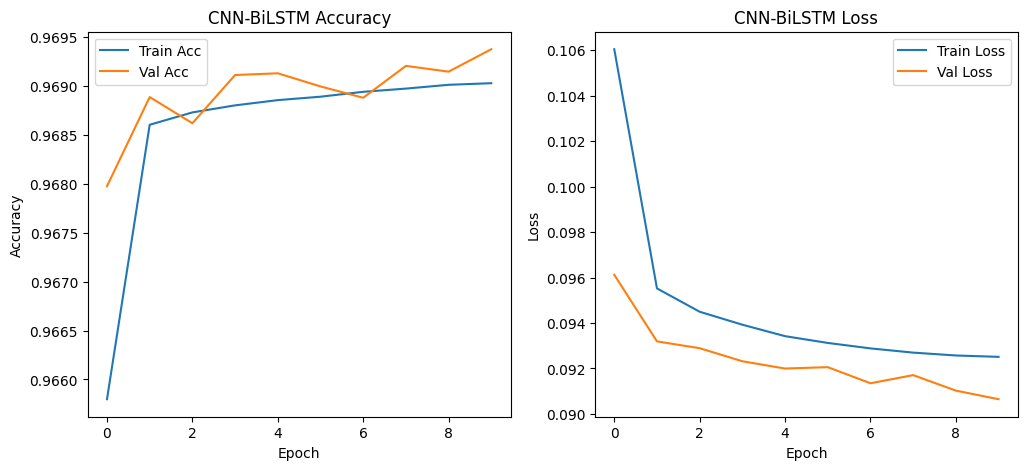

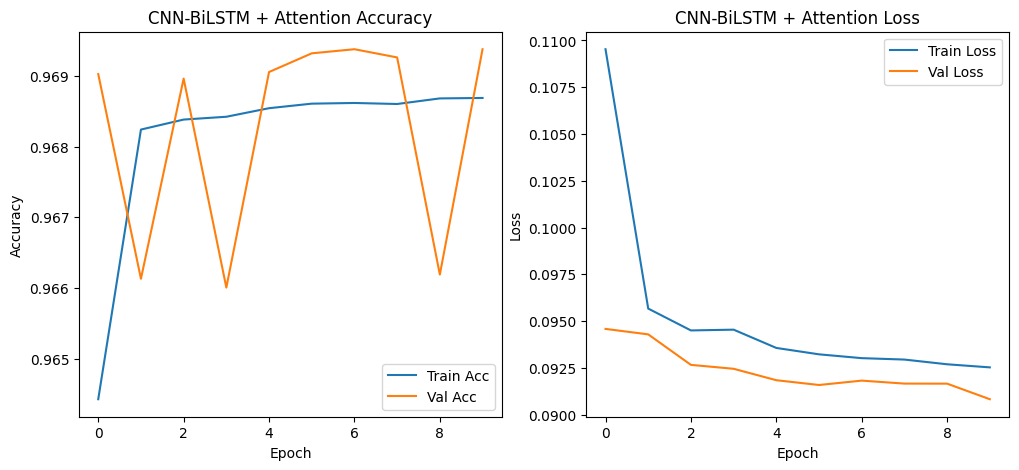

In [19]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history_cnn_bilstm, "CNN-BiLSTM")
plot_training_history(history_cnn_bilstm_attn, "CNN-BiLSTM + Attention")


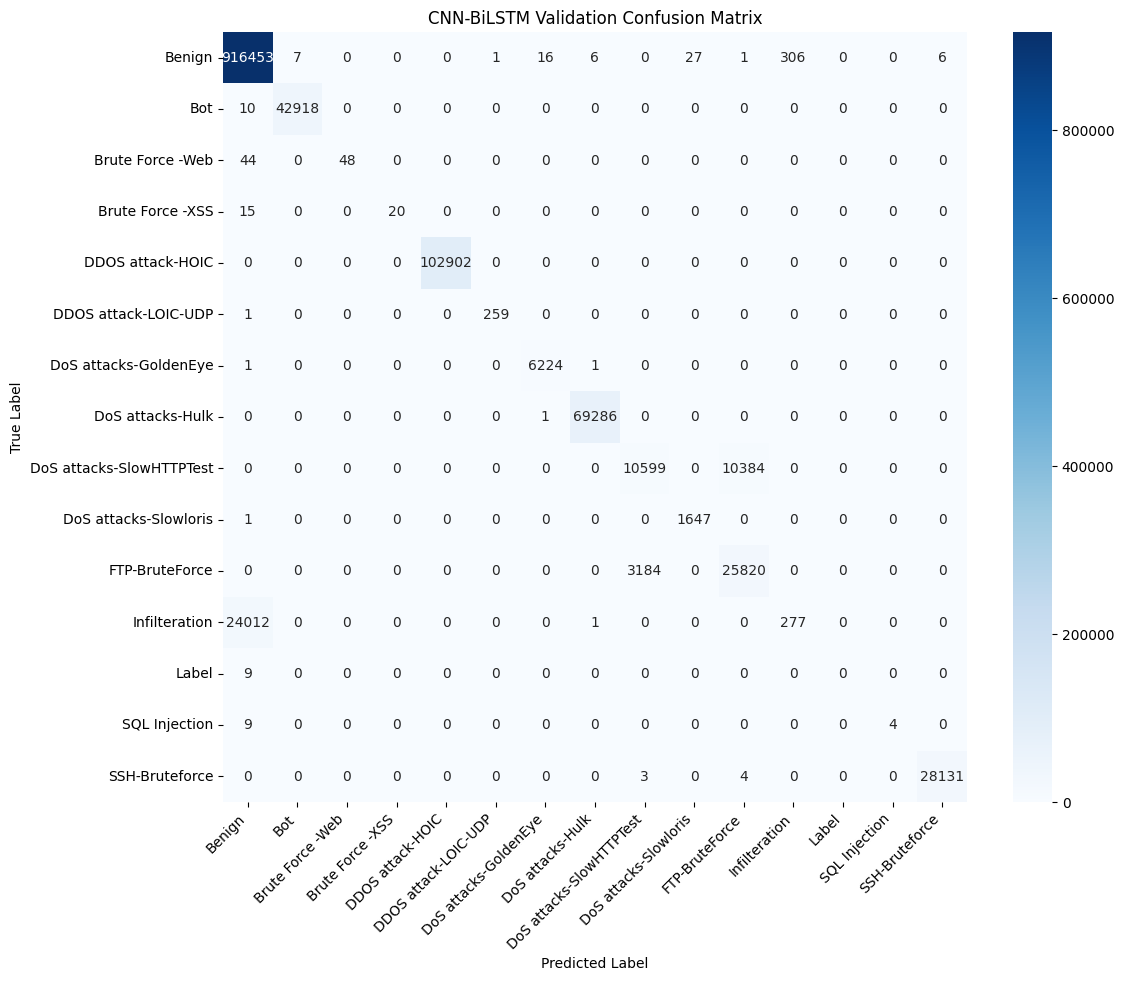

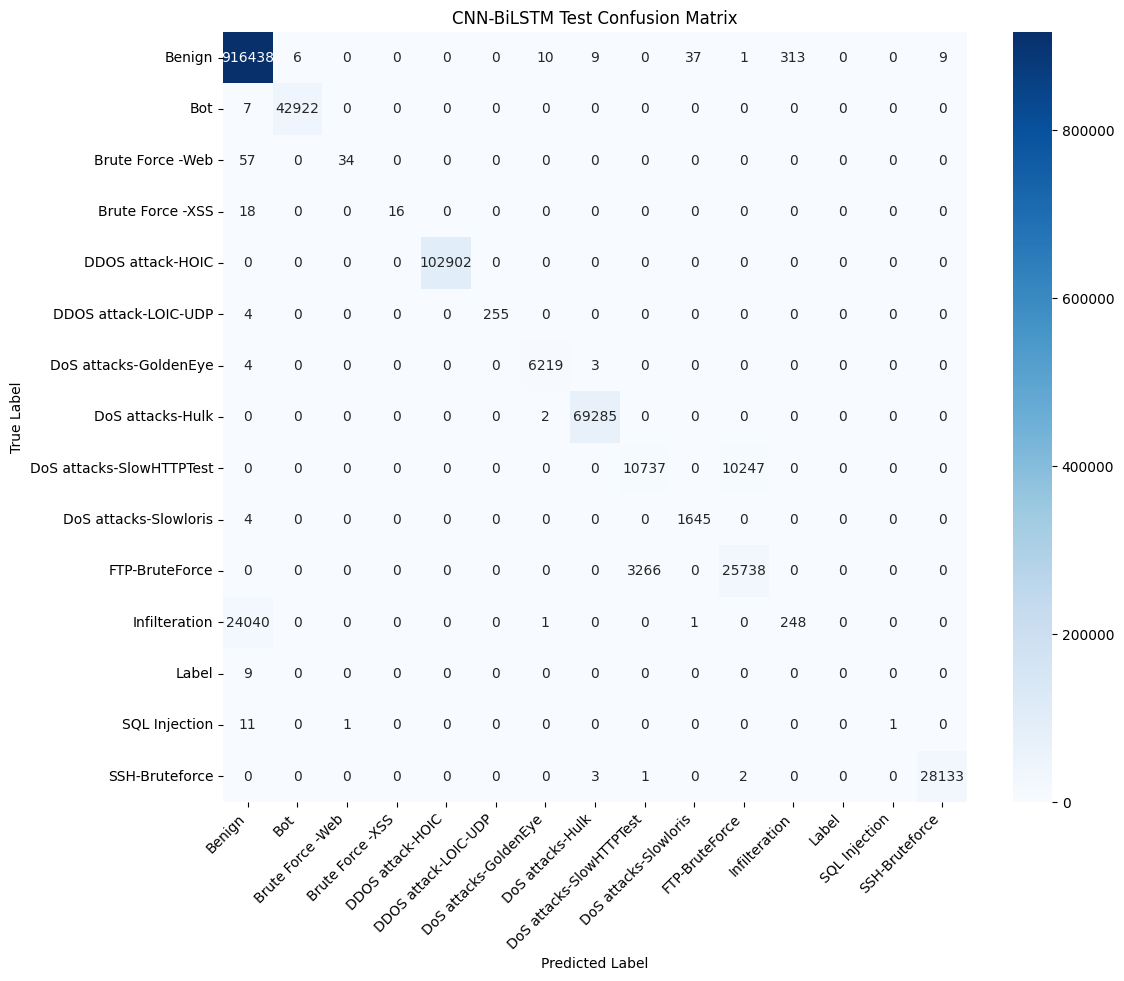

In [20]:
import seaborn as sns

def plot_confusion_matrix(cm, label_names, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

plot_confusion_matrix(cm_valid, label_names, "CNN-BiLSTM Validation Confusion Matrix")
plot_confusion_matrix(cm_test, label_names, "CNN-BiLSTM Test Confusion Matrix")


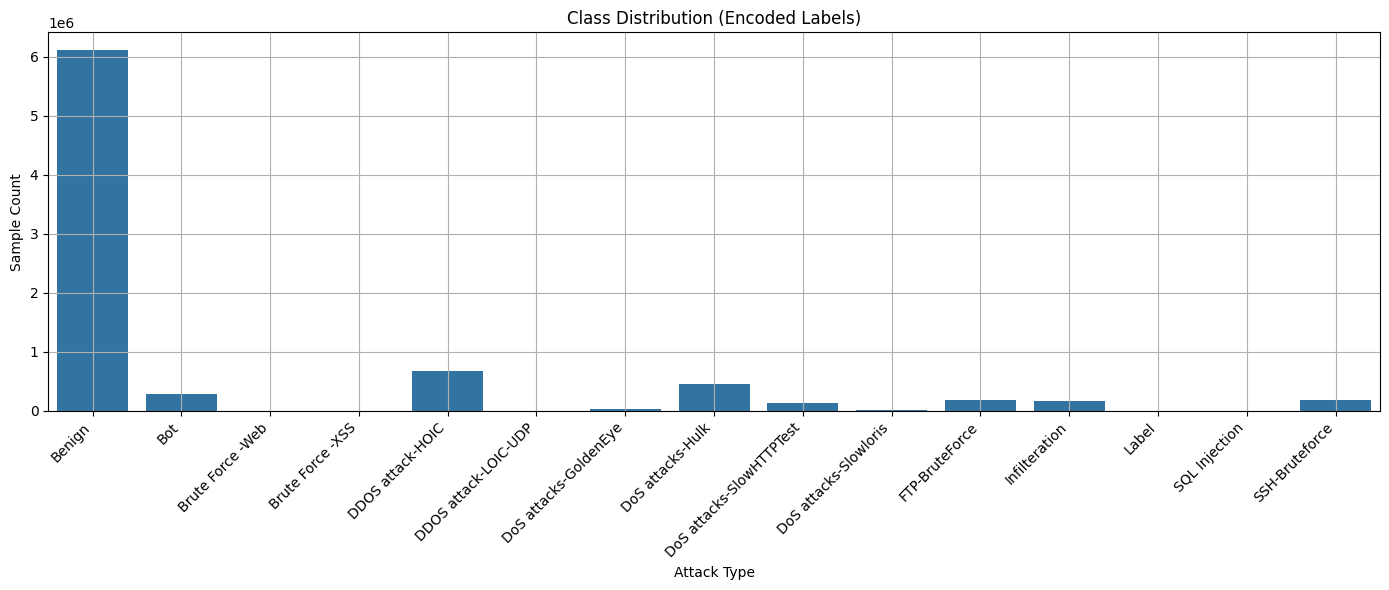

In [ ]:
# Plot label distribution
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['Label'].value_counts().sort_index()

# Get the label names
label_names = list(label_mapping.keys())

# Plot the class distribution
plt.figure(figsize=(14, 6))
sns.barplot(x=label_names, y=label_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Class Distribution (Encoded Labels)')
plt.xlabel('Attack Type')
plt.ylabel('Sample Count')
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# Check for missing values in the dataset
missing_data = df.isnull().sum()
print("Missing data in each column:\n", missing_data)


Missing data in each column:
 Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 79, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA # Import PCA
from IPython.display import display # Ensure display is imported if used

# Define the file path
# csv_path = "/content/your_dataset.csv" # Use the gdown downloaded file
csv_path = "/content/your_dataset.csv"

# --- Attempt to read the CSV with different settings ---
df = None # Initialize df to None

print(f"Attempting to read CSV from: {csv_path}")

try:
    # Try reading with default settings first (comma, 'latin1', 'skip')
    print("Attempt 1: Reading with default settings (engine='c', sep=',', encoding='latin1', on_bad_lines='skip')...")
    df = pd.read_csv(csv_path, encoding='latin1', on_bad_lines='skip')
    # Check if the dataframe is empty or doesn't have 'Label'
    if df is not None and not df.empty and 'Label' in df.columns:
        print("✅ Dataset loaded successfully with default settings.")
    else:
        print("❌ Attempt 1 did not load a valid dataset with 'Label' column.")
        df = None # Reset df if not valid

except pd.errors.ParserError as e:
    print(f"❌ Attempt 1 failed with ParserError: {e}")

# If Attempt 1 failed, try Attempt 2
if df is None:
    print("Attempt 2: Trying with engine='python' which is slower but more robust to formatting issues...")
    try:
        # Try with the 'python' engine
        df = pd.read_csv(csv_path, encoding='latin1', on_bad_lines='skip', engine='python')
        # Check if the dataframe is empty or doesn't have 'Label'
        if df is not None and not df.empty and 'Label' in df.columns:
            print("✅ Dataset loaded successfully with engine='python'.")
        else:
            print("❌ Attempt 2 did not load a valid dataset with 'Label' column.")
            df = None # Reset df if not valid
    except pd.errors.ParserError as e_python:
        print(f"❌ Attempt 2 failed with ParserError using engine='python': {e_python}")

# If Attempt 2 failed, try Attempt 3 with other separators
if df is None:
    print("Attempt 3: Trying engine='python' with common alternative delimiters (e.g., ';', '\t')...")
    # Try other common delimiters with the python engine
    possible_separators = [';', '\t', '|'] # Added '|' as another common one
    loaded = False
    for sep in possible_separators:
        print(f"   Trying with separator='{sep}'...")
        try:
            df = pd.read_csv(csv_path, encoding='latin1', on_bad_lines='skip', engine='python', sep=sep)
            # Check if the dataframe is valid and has 'Label'
            if df is not None and not df.empty and 'Label' in df.columns:
                print(f"   ✅ Dataset loaded successfully with separator='{sep}' and engine='python'.")
                loaded = True
                break # Stop if successful
            else:
                 print(f"   ❌ Failed with separator='{sep}': Did not load a valid dataset with 'Label' column.")
                 df = None # Reset df if not valid
        except Exception as e_sep:
            print(f"   ❌ Failed with separator='{sep}': {e_sep}")

    if not loaded:
        print("\n❌ All standard attempts to read the CSV failed.")
        print("This might be due to complex malformed lines, unusual encoding, or severe file corruption.")
        print("Manual inspection or pre-processing of the CSV might be required.")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA # Import PCA
from IPython.display import display # Ensure display is imported if used

# Define the file path
# csv_path = "/content/your_dataset.csv" # Use the gdown downloaded file
csv_path = "/content/your_dataset.csv"

# --- Attempt to read the CSV with different settings ---
df = None # Initialize df to None

print(f"Attempting to read CSV from: {csv_path}")

try:
    # Try reading with default settings first (comma, 'latin1', 'skip')
    print("Attempt 1: Reading with default settings (engine='c', sep=',', encoding='latin1', on_bad_lines='skip')...")
    df = pd.read_csv(csv_path, encoding='latin1', on_bad_lines='skip')
    # Check if the dataframe is empty or doesn't have 'Label'
    if df is not None and not df.empty and 'Label' in df.columns:
        print("✅ Dataset loaded successfully with default settings.")
    else:
        print("❌ Attempt 1 did not load a valid dataset with 'Label' column.")
        df = None # Reset df if not valid

except pd.errors.ParserError as e:
    print(f"❌ Attempt 1 failed with ParserError: {e}")

# If Attempt 1 failed, try Attempt 2
if df is None:
    print("Attempt 2: Trying with engine='python' which is slower but more robust to formatting issues...")
    try:
        # Try with the 'python' engine
        df = pd.read_csv(csv_path, encoding='latin1', on_bad_lines='skip', engine='python')
        # Check if the dataframe is empty or doesn't have 'Label'
        if df is not None and not df.empty and 'Label' in df.columns:
            print("✅ Dataset loaded successfully with engine='python'.")
        else:
            print("❌ Attempt 2 did not load a valid dataset with 'Label' column.")
            df = None # Reset df if not valid
    except pd.errors.ParserError as e_python:
        print(f"❌ Attempt 2 failed with ParserError using engine='python': {e_python}")
    except Exception as e_other_python:
         print(f"❌ An unexpected error occurred during Attempt 2 (engine='python'): {e_other_python}")
         df = None # Ensure df is None if any other error occurs


# If Attempt 2 failed, try Attempt 3 with other separators
if df is None:
    print("Attempt 3: Trying engine='python' with common alternative delimiters (e.g., ';', '\t')...")
    # Try other common delimiters with the python engine
    possible_separators = [';', '\t', '|'] # Added '|' as another common one
    loaded = False
    for sep in possible_separators:
        print(f"   Trying with separator='{sep}'...")
        try:
            df = pd.read_csv(csv_path, encoding='latin1', on_bad_lines='skip', engine='python', sep=sep)
            # Check if the dataframe is valid and has 'Label'
            if df is not None and not df.empty and 'Label' in df.columns:
                print(f"   ✅ Dataset loaded successfully with separator='{sep}' and engine='python'.")
                loaded = True
                break # Stop if successful
            else:
                 print(f"   ❌ Failed with separator='{sep}': Did not load a valid dataset with 'Label' column.")
                 df = None # Reset df if not valid
        except Exception as e_sep:
            print(f"   ❌ Failed with separator='{sep}': {e_sep}")

    if not loaded:
        print("\n❌ All standard attempts to read the CSV failed.")
        print("This might be due to complex malformed lines, unusual encoding, or severe file corruption.")
        print("Manual inspection or pre-processing of the CSV might be required.")
        df = None # Ensure df is None if reading failed after all attempts

# --- Rest of the code proceeds only if df was loaded and contains 'Label' ---
if df is not None and 'Label' in df.columns:
    print("\n✅ Dataset loaded successfully and 'Label' column found:", df.shape)
    display(df.head()) # Display initial head after loading


    # Drop 'Timestamp' column
    if 'Timestamp' in df.columns:
        df = df.drop(columns=['Timestamp'], errors='ignore')
        print("✅ 'Timestamp' column dropped.")
    else:
        print("❗️ 'Timestamp' column not found. Skipping drop.")

    # Initialize and fit the label encoder on the entire 'Label' column
    print("\nEncoding 'Label' column...")
    label_encoder = LabelEncoder()
    # Handle potential NaNs in the 'Label' column before encoding if necessary
    if df['Label'].isnull().any():
         print("❗️ Found missing values in 'Label' column. Filling with 'Unknown' before encoding.")
         df['Label'] = df['Label'].fillna('Unknown') # Or some other placeholder

    # Ensure 'Label' column is string type before encoding for consistency
    df['Label'] = df['Label'].astype(str)
    df['Label'] = label_encoder.fit_transform(df['Label'])
    print("✅ 'Label' column encoded.")

    # Show label mapping and distribution
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    label_counts = df['Label'].value_counts().sort_index()

    # Get the corresponding label names ensuring they match the sorted label_counts indices
    # Sort the classes first to match the sorted counts
    sorted_classes = sorted(label_mapping.keys(), key=lambda x: label_mapping[x])
    label_names = sorted_classes
    # Create inverse mapping for plotting
    inv_label_mapping = {v: k for k, v in label_mapping.items()}

    print("\n✅ Label mapping:", label_mapping)
    print("✅ Label counts:\n", label_counts)

    # --- Data Cleaning and Preparation before Scaling and PCA ---

    print("\nStarting data cleaning and preparation...")

    # Get all column names except 'Label'
    all_columns_except_label = [col for col in df.columns if col != 'Label']

    # Try converting potential numerical columns to numeric, coercing errors
    print("Attempting to convert non-Label columns to numeric...")
    for col in all_columns_except_label:
        # Convert column to numeric, turning errors into NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Fill any NaNs that might have been introduced by coercion or existed previously
    # We fill with 0 as per the original code, but consider other imputation methods if appropriate
    print("Filling missing values (NaNs) with 0...")
    df = df.fillna(0)

    # DIAGNOSTIC: Check data types after cleaning and conversion
    print("\nData types after cleaning and numeric coercion:")
    print(df.dtypes)
    print("\nDataFrame head after cleaning and numeric coercion:")
    display(df.head())


    # Check for infinite values and replace them BEFORE scaling or PCA
    print("\nChecking for and replacing infinite values...")
    # Iterate only through columns that are now numeric type (after coercion and fillna)
    numeric_cols_after_cleaning = df.select_dtypes(include=np.number).columns.tolist()
    # Ensure 'Label' is not included in this check if it was numeric
    if 'Label' in numeric_cols_after_cleaning:
        numeric_cols_after_cleaning.remove('Label')


    for col in numeric_cols_after_cleaning:
        if np.isinf(df[col]).any():
            print(f"❗️ Found infinite values in column: {col}. Replacing with max/min finite value.")
            # Use dtypes of the actual dataframe columns
            # Use np.issubdtype to be more robust with integer/float types
            if np.issubdtype(df[col].dtype, np.floating):
                 max_val = np.finfo(df[col].dtype).max
                 min_val = np.finfo(df[col].dtype).min
            elif np.issubdtype(df[col].dtype, np.integer):
                 max_val = np.iinfo(df[col].dtype).max
                 min_val = np.iinfo(df[col].dtype).min
            else: # Should not happen with select_dtypes(include=np.number) but as a safeguard
                 print(f"Skipping inf replacement for non-numeric column: {col}")
                 continue

            df[col] = np.where(df[col] == np.inf, max_val, df[col])
            df[col] = np.where(df[col] == -np.inf, min_val, df[col])

    print("Data cleaning and preparation complete.")

    # --- Scaling and PCA ---

    # Select numerical features for scaling and PCA (excluding 'Label')
    # This step now operates on the cleaned df
    numerical_features = df.select_dtypes(include=np.number).drop(columns=['Label'], errors='ignore')

    print("\nSelected numerical columns for scaling:", numerical_features.columns.tolist())
    print("Shape of numerical_features before scaling:", numerical_features.shape)

    # DIAGNOSTIC: Display numerical_features head
    print("\nNumerical features head before scaling:")
    display(numerical_features.head())


    df_scaled = None # Initialize df_scaled outside the conditional block

    # Check if numerical_features is empty before scaling
    if numerical_features.empty:
        print("\n❌ No numerical columns found for scaling after cleaning. Please check your dataset. Skipping Scaling and PCA.")
    else:
        # Standardize the numerical features
        print("Scaling numerical features...")
        scaler = StandardScaler()
        numerical_features_scaled = scaler.fit_transform(numerical_features)

        # Convert scaled features back to DataFrame to check for NaNs/Infs easily by column name
        numerical_features_scaled_df = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)

        # FINAL CHECK FOR NaNs/Infs IN SCALED DATA BEFORE PCA
        print("Final check for NaNs/Infs in scaled features before PCA...")
        if numerical_features_scaled_df.isnull().any().any() or np.isinf(numerical_features_scaled_df).any().any():
            print("\n❌ Found NaNs or Infs in scaled data. Cannot proceed with PCA.")
            # Identify which columns contain NaNs/Infs in the scaled data
            nan_cols_scaled = numerical_features_scaled_df.columns[numerical_features_scaled_df.isnull().any()].tolist()
            inf_cols_scaled = numerical_features_scaled_df.columns[np.isinf(numerical_features_scaled_df).any()].tolist()
            print(f"NaN columns in scaled data: {nan_cols_scaled}")
            print(f"Infinite columns in scaled data: {inf_cols_scaled}")
            # You might need to add more robust imputation or filtering steps here
        else:
            print("✅ No NaNs or Infs found in scaled data. Proceeding with PCA.")

            # Apply PCA (reduce to 2 components)
            print("Applying PCA...")
            pca = PCA(n_components=2)
            # Pass the numpy array from the scaled DataFrame to PCA
            pca_result = pca.fit_transform(numerical_features_scaled_df.values)

            # Create a DataFrame with PCA components and 'Label' for coloring the points
            pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
            # Add the 'Label' column back. Ensure the index aligns correctly.
            # We already checked if 'Label' exists in df at the start of this block
            pca_df['Label'] = df['Label'].reset_index(drop=True) # Use original df['Label'] and reset index to match pca_df

            # Check the first few rows of the PCA result
            print("\n✅ PCA applied successfully. PCA DataFrame head:")
            display(pca_df.head())

            # Plot the PCA result - only if 'Label' column was available for coloring
            # We already checked if 'inv_label_mapping' exists
            print("\nGenerating PCA Plot...")
            plt.figure(figsize=(10, 6))
            # Use the original label names for the legend
            # Create a list of original label names ordered by their encoded value for plotting legend
            pca_df['Attack Type'] = pca_df['Label'].map(inv_label_mapping)

            sns.scatterplot(x='PC1', y='PC2', hue='Attack Type', data=pca_df, palette='Set2', alpha=0.7, s=10) # Reduced point size (s=10)
            plt.title('PCA Visualization of Features')
            plt.xlabel('Principal Component 1')
            plt.ylabel('Principal Component 2')
            plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()


            # If scaling and PCA were successful, create df_scaled for subsequent analysis
            # Ensure df_scaled includes the scaled numerical features and the label
            df_scaled = numerical_features_scaled_df.copy()
            df_scaled['Label'] = df['Label'].reset_index(drop=True) # Add Label from the original df
            print("\n✅ df_scaled created for further analysis.")
            display(df_scaled.head())


    # --- Rest of the plots (assuming df or df_scaled are available and 'Label' was processed) ---
    # These plots are included in this cell to run after data preparation

    # Example: Class distribution plot (uses original label_names and label_counts)
    # This plot should work if df was loaded and 'Label' column existed
    print("\nGenerating Class Distribution Plot...")
    plt.figure(figsize=(14, 6))
    # Ensure x-axis labels match the order of the y-axis values (counts)
    # Get the original label names in the order of the encoded counts
    ordered_label_names_plot = [inv_label_mapping[i] for i in label_counts.index]
    sns.barplot(x=ordered_label_names_plot, y=label_counts.values)
    # Map the x-axis labels back to the original names based on the sorted index
    plt.xticks(rotation=45, ha='right') # labels=label_names is handled by sns.barplot with strings directly
    plt.title('Class Distribution (Encoded Labels)')
    plt.xlabel('Attack Type')
    plt.ylabel('Sample Count')
    plt.tight_layout()
    plt.grid(True)
    plt.show()


    # Example: Boxplot for 'Flow Duration' (uses df_scaled if available, otherwise df)
    # Check if df_scaled exists and contains 'Flow Duration'. If not, use df if it has the column.
    print("\nAttempting to generate Flow Duration Boxplot...")
    # Ensure 'Flow Duration' is a numerical column before attempting to plot
    if 'Flow Duration' in df.columns and np.issubdtype(df['Flow Duration'].dtype, np.number):
        # Prioritize df_scaled if available and has the required columns
        if df_scaled is not None and 'Flow Duration' in df_scaled.columns and 'Label' in df_scaled.columns:
            print("Using scaled data (df_scaled) for Flow Duration Boxplot.")
            plt.figure(figsize=(14, 6))
            # Get order from unique labels in df_scaled['Label'] and sort them to match ticks
            ordered_encoded_labels = sorted(df_scaled['Label'].unique())
            ordered_label_names = [inv_label_mapping[i] for i in ordered_encoded_labels]

            sns.boxplot(x='Label', y='Flow Duration', data=df_scaled)
            plt.xticks(ticks=ordered_encoded_labels, labels=ordered_label_names, rotation=45, ha='right')
            plt.title('Boxplot of Flow Duration by Label')
            plt.xlabel('Attack Type')
            plt.ylabel('Flow Duration (Scaled)') # Indicate scaled
            plt.tight_layout()
            plt.show()
        # Fallback to unscaled df if df_scaled is not suitable but df is
        elif 'Label' in df.columns:
             print("Using unscaled data (df) for Flow Duration Boxplot.")
             plt.figure(figsize=(14, 6))
             # Get order from unique labels in df['Label'] and sort them to match ticks
             ordered_encoded_labels = sorted(df['Label'].unique())
             ordered_label_names = [inv_label_mapping[i] for i in ordered_encoded_labels]

             sns.boxplot(x='Label', y='Flow Duration', data=df)
             plt.xticks(ticks=ordered_encoded_labels, labels=ordered_label_names, rotation=45, ha='right')
             plt.title('Boxplot of Flow Duration by Label')
             plt.xlabel('Attack Type')
             plt.ylabel('Flow Duration')
             plt.tight_layout()
             plt.show()
        else:
             print("Skipping Flow Duration Boxplot: 'Label' column or inverse label mapping not available for plotting labels.")
    else:
        print("Skipping Flow Duration Boxplot as 'Flow Duration' column is not numeric or not found in the original data.")


else:
    print("\n‼️ DataFrame was not loaded successfully or 'Label' column was not found. Please check the CSV file and path.")
    # Set df_scaled to None explicitly if df loading failed, to prevent later errors
    df_scaled = None


# --- Rest of the code proceeds only if df was loaded and contains 'Label' ---
if df is not None and 'Label' in df.columns:
    print("\n✅ Dataset loaded successfully and 'Label' column found:", df.shape)
    display(df.head()) # Display initial head after loading


    # Drop 'Timestamp' column
    if 'Timestamp' in df.columns:
        df = df.drop(columns=['Timestamp'], errors='ignore')
        print("✅ 'Timestamp' column dropped.")
    else:
        print("❗️ 'Timestamp' column not found. Skipping drop.")

    # Initialize and fit the label encoder on the entire 'Label' column
    print("\nEncoding 'Label' column...")
    label_encoder = LabelEncoder()
    # Handle potential NaNs in the 'Label' column before encoding if necessary
    if df['Label'].isnull().any():
         print("❗️ Found missing values in 'Label' column. Filling with 'Unknown' before encoding.")
         df['Label'] = df['Label'].fillna('Unknown') # Or some other placeholder

    # Ensure 'Label' column is string type before encoding for consistency
    df['Label'] = df['Label'].astype(str)
    df['Label'] = label_encoder.fit_transform(df['Label'])
    print("✅ 'Label' column encoded.")

    # Show label mapping and distribution
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    label_counts = df['Label'].value_counts().sort_index()

    # Get the corresponding label names ensuring they match the sorted label_counts indices
    # Sort the classes first to match the sorted counts
    sorted_classes = sorted(label_mapping.keys(), key=lambda x: label_mapping[x])
    label_names = sorted_classes
    # Create inverse mapping for plotting
    inv_label_mapping = {v: k for k, v in label_mapping.items()}

    print("\n✅ Label mapping:", label_mapping)
    print("✅ Label counts:\n", label_counts)

    # --- Data Cleaning and Preparation before Scaling and PCA ---

    print("\nStarting data cleaning and preparation...")

    # Get all column names except 'Label'
    all_columns_except_label = [col for col in df.columns if col != 'Label']

    # Try converting potential numerical columns to numeric, coercing errors
    print("Attempting to convert non-Label columns to numeric...")
    for col in all_columns_except_label:
        # Convert column to numeric, turning errors into NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Fill any NaNs that might have been introduced by coercion or existed previously
    # We fill with 0 as per the original code, but consider other imputation methods if appropriate
    print("Filling missing values (NaNs) with 0...")
    df = df.fillna(0)

    # DIAGNOSTIC: Check data types after cleaning and conversion
    print("\nData types after cleaning and numeric coercion:")
    print(df.dtypes)
    print("\nDataFrame head after cleaning and numeric coercion:")
    display(df.head())


    # Check for infinite values and replace them BEFORE scaling or PCA
    print("\nChecking for and replacing infinite values...")
    # Iterate only through columns that are now numeric type (after coercion and fillna)
    numeric_cols_after_cleaning = df.select_dtypes(include=np.number).columns.tolist()
    # Ensure 'Label' is not included in this check if it was numeric
    if 'Label' in numeric_cols_after_cleaning:
        numeric_cols_after_cleaning.remove('Label')


    for col in numeric_cols_after_cleaning:
        if np.isinf(df[col]).any():
            print(f"❗️ Found infinite values in column: {col}. Replacing with max/min finite value.")
            # Use dtypes of the actual dataframe columns
            # Use np.issubdtype to be more robust with integer/float types
            if np.issubdtype(df[col].dtype, np.floating):
                 max_val = np.finfo(df[col].dtype).max
                 min_val = np.finfo(df[col].dtype).min
            elif np.issubdtype(df[col].dtype, np.integer):
                 max_val = np.iinfo(df[col].dtype).max
                 min_val = np.iinfo(df[col].dtype).min
            else: # Should not happen with select_dtypes(include=np.number) but as a safeguard
                 print(f"Skipping inf replacement for non-numeric column: {col}")
                 continue

            df[col] = np.where(df[col] == np.inf, max_val, df[col])
            df[col] = np.where(df[col] == -np.inf, min_val, df[col])

    print("Data cleaning and preparation complete.")

    # --- Scaling and PCA ---

    # Select numerical features for scaling and PCA (excluding 'Label')
    # This step now operates on the cleaned df
    numerical_features = df.select_dtypes(include=np.number).drop(columns=['Label'], errors='ignore')

    print("\nSelected numerical columns for scaling:", numerical_features.columns.tolist())
    print("Shape of numerical_features before scaling:", numerical_features.shape)

    # DIAGNOSTIC: Display numerical_features head
    print("\nNumerical features head before scaling:")
    display(numerical_features.head())


    df_scaled = None # Initialize df_scaled outside the conditional block

    # Check if numerical_features is empty before scaling
    if numerical_features.empty:
        print("\n❌ No numerical columns found for scaling after cleaning. Please check your dataset. Skipping Scaling and PCA.")
    else:
        # Standardize the numerical features
        print("Scaling numerical features...")
        scaler = StandardScaler()
        numerical_features_scaled = scaler.fit_transform(numerical_features)

        # Convert scaled features back to DataFrame to check for NaNs/Infs easily by column name
        numerical_features_scaled_df = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)

        # FINAL CHECK FOR NaNs/Infs IN SCALED DATA BEFORE PCA
        print("Final check for NaNs/Infs in scaled features before PCA...")
        if numerical_features_scaled_df.isnull().any().any() or np.isinf(numerical_features_scaled_df).any().any():
            print("\n❌ Found NaNs or Infs in scaled data. Cannot proceed with PCA.")
            # Identify which columns contain NaNs/Infs in the scaled data
            nan_cols_scaled = numerical_features_scaled_df.columns[numerical_features_scaled_df.isnull().any()].tolist()
            inf_cols_scaled = numerical_features_scaled_df.columns[np.isinf(numerical_features_scaled_df).any()].tolist()
            print(f"NaN columns in scaled data: {nan_cols_scaled}")
            print(f"Infinite columns in scaled data: {inf_cols_scaled}")
            # You might need to add more robust imputation or filtering steps here
        else:
            print("✅ No NaNs or Infs found in scaled data. Proceeding with PCA.")

            # Apply PCA (reduce to 2 components)
            print("Applying PCA...")
            pca = PCA(n_components=2)
            # Pass the numpy array from the scaled DataFrame to PCA
            pca_result = pca.fit_transform(numerical_features_scaled_df.values)

            # Create a DataFrame with PCA components and 'Label' for coloring the points
            pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
            # Add the 'Label' column back. Ensure the index aligns correctly.
            # We already checked if 'Label' exists in df at the start of this block
            pca_df['Label'] = df['Label'].reset_index(drop=True) # Use original df['Label'] and reset index to match pca_df

            # Check the first few rows of the PCA result
            print("\n✅ PCA applied successfully. PCA DataFrame head:")
            display(pca_df.head())

            # Plot the PCA result - only if 'Label' column was available for coloring
            # We already checked if 'inv_label_mapping' exists
            print("\nGenerating PCA Plot...")
            plt.figure(figsize=(10, 6))
            # Use the original label names for the legend
            # Create a list of original label names ordered by their encoded value for plotting legend
            pca_df['Attack Type'] = pca_df['Label'].map(inv_label_mapping)

            sns.scatterplot(x='PC1', y='PC2', hue='Attack Type', data=pca_df, palette='Set2', alpha=0.7, s=10) # Reduced point size (s=10)
            plt.title('PCA Visualization of Features')
            plt.xlabel('Principal Component 1')
            plt.ylabel('Principal Component 2')
            plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.show()


            # If scaling and PCA were successful, create df_scaled for subsequent analysis
            # Ensure df_scaled includes the scaled numerical features and the label
            df_scaled = numerical_features_scaled_df.copy()
            df_scaled['Label'] = df['Label'].reset_index(drop=True) # Add Label from the original df
            print("\n✅ df_scaled created for further analysis.")
            display(df_scaled.head())


    # --- Rest of the plots (assuming df or df_scaled are available and 'Label' was processed) ---
    # These plots are included in this cell to run after data preparation

    # Example: Class distribution plot (uses original label_names and label_counts)
    # This plot should work if df was loaded and 'Label' column existed
    print("\nGenerating Class Distribution Plot...")
    plt.figure(figsize=(14, 6))
    # Ensure x-axis labels match the order of the y-axis values (counts)
    # Get the original label names in the order of the encoded counts
    ordered_label_names_plot = [inv_label_mapping[i] for i in label_counts.index]
    sns.barplot(x=ordered_label_names_plot, y=label_counts.values)
    # Map the x-axis labels back to the original names based on the sorted index
    plt.xticks(rotation=45, ha='right') # labels=label_names is handled by sns.barplot with strings directly
    plt.title('Class Distribution (Encoded Labels)')
    plt.xlabel('Attack Type')
    plt.ylabel('Sample Count')
    plt.tight_layout()
    plt.grid(True)
    plt.show()


    # Example: Boxplot for 'Flow Duration' (uses df_scaled if available, otherwise df)
    # Check if df_scaled exists and contains 'Flow Duration'. If not, use df if it has the column.
    print("\nAttempting to generate Flow Duration Boxplot...")
    # Ensure 'Flow Duration' is a numerical column before attempting to plot
    if 'Flow Duration' in df.columns and np.issubdtype(df['Flow Duration'].dtype, np.number):
        # Prioritize df_scaled if available and has the required columns
        if df_scaled is not None and 'Flow Duration' in df_scaled.columns and 'Label' in df_scaled.columns:
            print("Using scaled data (df_scaled) for Flow Duration Boxplot.")
            plt.figure(figsize=(14, 6))
            # Get order from unique labels in df_scaled['Label'] and sort them to match ticks
            ordered_encoded_labels = sorted(df_scaled['Label'].unique())
            ordered_label_names = [inv_label_mapping[i] for i in ordered_encoded_labels]

            sns.boxplot(x='Label', y='Flow Duration', data=df_scaled)
            plt.xticks(ticks=ordered_encoded_labels, labels=ordered_label_names, rotation=45, ha='right')
            plt.title('Boxplot of Flow Duration by Label')
            plt.xlabel('Attack Type')
            plt.ylabel('Flow Duration (Scaled)') # Indicate scaled
            plt.tight_layout()
            plt.show()
        # Fallback to unscaled df if df_scaled is not suitable but df is
        elif 'Label' in df.columns:
             print("Using unscaled data (df) for Flow Duration Boxplot.")
             plt.figure(figsize=(14, 6))
             # Get order from unique labels in df['Label'] and sort them to match ticks
             ordered_encoded_labels = sorted(df['Label'].unique())
             ordered_label_names = [inv_label_mapping[i] for i in ordered_encoded_labels]

             sns.boxplot(x='Label', y='Flow Duration', data=df)
             plt.xticks(ticks=ordered_encoded_labels, labels=ordered_label_names, rotation=45, ha='right')
             plt.title('Boxplot of Flow Duration by Label')
             plt.xlabel('Attack Type')
             plt.ylabel('Flow Duration')
             plt.tight_layout()
             plt.show()
        else:
             print("Skipping Flow Duration Boxplot: 'Label' column or inverse label mapping not available for plotting labels.")
    else:
        print("Skipping Flow Duration Boxplot as 'Flow Duration' column is not numeric or not found in the original data.")


else:
    print("\n‼️ DataFrame was not loaded successfully or 'Label' column was not found. Please check the CSV file and path.")
    # Set df_scaled to None explicitly if df loading failed, to prevent later errors
    df_scaled = None

Attempting to read CSV from: /content/your_dataset.csv
Attempt 1: Reading with default settings (engine='c', sep=',', encoding='latin1', on_bad_lines='skip')...
❌ Attempt 1 failed with ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

Attempt 2: Trying with engine='python' which is slower but more robust to formatting issues...
❌ Attempt 2 did not load a valid dataset with 'Label' column.
Attempt 3: Trying engine='python' with common alternative delimiters (e.g., ';', '	')...
   Trying with separator=';'...
   ❌ Failed with separator=';': Did not load a valid dataset with 'Label' column.
   Trying with separator='	'...
   ❌ Failed with separator='	': Did not load a valid dataset with 'Label' column.
   Trying with separator='|'...
   ❌ Failed with separator='|': Did not load a valid dataset with 'Label' column.

❌ All standard attempts to read the CSV failed.
This might be due to complex malformed lines, unusual encoding, or severe fi

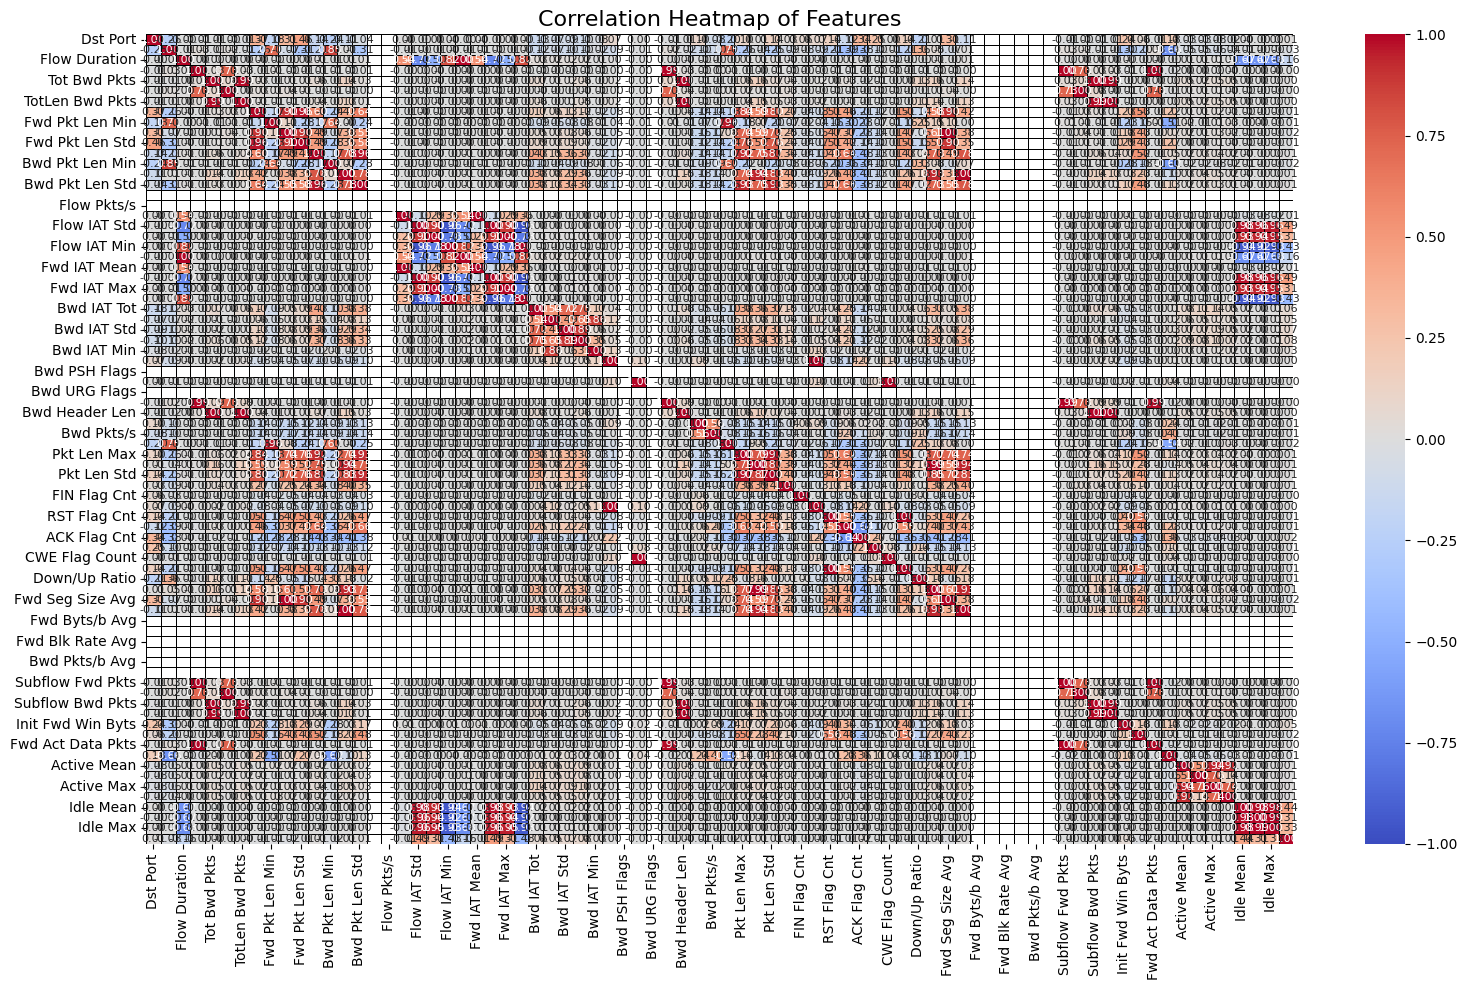

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numerical features
corr_matrix = df_scaled.drop(columns=['Label']).corr()

# Plot the heatmap with improved clarity
plt.figure(figsize=(16, 10))  # Increase figure size for better readability
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True,
            annot_kws={"size": 8},  # Smaller font size for annotations
            linewidths=0.5, linecolor='black',  # Add lines between cells for clarity
            vmin=-1, vmax=1)  # Set color scale limits for better contrast

# Title and layout adjustments
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.tight_layout()
plt.show()


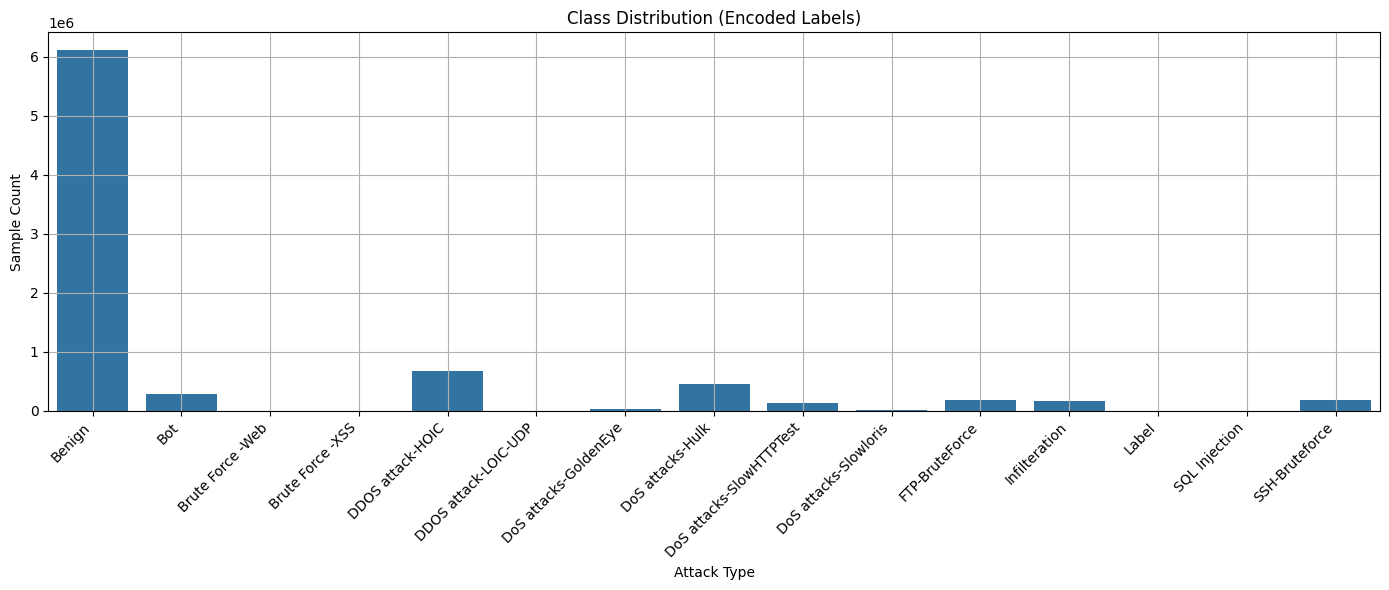

In [ ]:
# Class distribution plot
plt.figure(figsize=(14, 6))
sns.barplot(x=label_names, y=label_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Class Distribution (Encoded Labels)')
plt.xlabel('Attack Type')
plt.ylabel('Sample Count')
plt.tight_layout()
plt.grid(True)
plt.show()


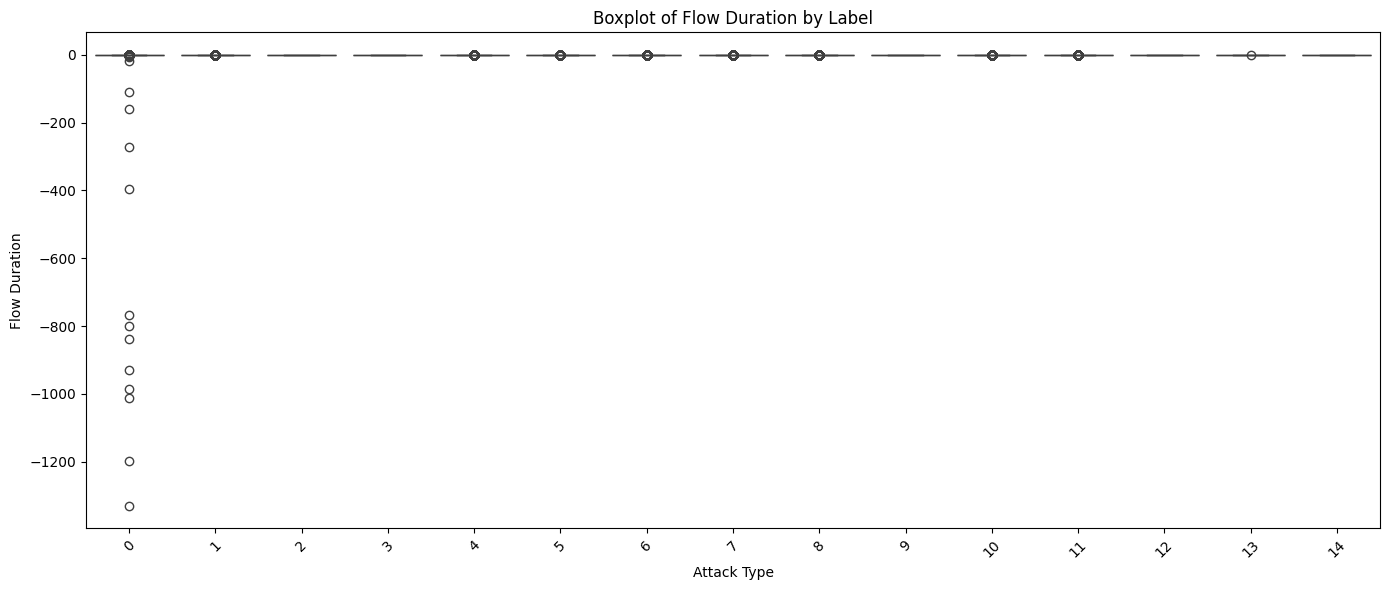

In [ ]:
# Plot a boxplot for 'Flow Duration' across different attack types
plt.figure(figsize=(14, 6))
sns.boxplot(x='Label', y='Flow Duration', data=df_scaled)
plt.title('Boxplot of Flow Duration by Label')
plt.xlabel('Attack Type')
plt.ylabel('Flow Duration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display # Ensure display is imported if used

# Define the file path
csv_path = "/content/combined_cic18.csv"  # Adjust path if needed

# Load the entire dataset
# Assuming the concatenated df fits into memory as per the global variable df size.
try:
    df = pd.read_csv(csv_path, encoding='latin1', on_bad_lines='skip')
    print("✅ Dataset loaded:", df.shape)
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    # Exit or handle the error appropriately if loading fails
    # For now, we'll assume loading was successful as per context

# Drop 'Timestamp' column
df = df.drop(columns=['Timestamp'], errors='ignore')

# Initialize and fit the label encoder on the entire 'Label' column
label_encoder = LabelEncoder()
# Handle potential NaNs in the 'Label' column before encoding if necessary
if df['Label'].isnull().any():
     print("❗️ Found missing values in 'Label' column. Filling with 'Unknown' before encoding.")
     df['Label'] = df['Label'].fillna('Unknown') # Or some other placeholder
df['Label'] = label_encoder.fit_transform(df['Label'])


# Show label mapping and distribution
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_counts = df['Label'].value_counts().sort_index()

# Get the corresponding label names ensuring they match the sorted label_counts indices
# Sort the classes first to match the sorted counts
sorted_classes = sorted(label_mapping.keys(), key=lambda x: label_mapping[x])
label_names = sorted_classes
# Create inverse mapping for plotting
inv_label_mapping = {v: k for k, v in label_mapping.items()}


# --- Data Cleaning and Preparation before Scaling and PCA ---

print("\nStarting data cleaning and preparation...")

# Get all column names except 'Label'
all_columns_except_label = [col for col in df.columns if col != 'Label']

# Try converting potential numerical columns to numeric, coercing errors
print("Attempting to convert non-Label columns to numeric...")
for col in all_columns_except_label:
    # Convert column to numeric, turning errors into NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill any NaNs that might have been introduced by coercion or existed previously
# We fill with 0 as per the original code, but consider other imputation methods if appropriate
print("Filling missing values (NaNs) with 0...")
df = df.fillna(0)

# Check for infinite values and replace them BEFORE scaling or PCA
print("Checking for and replacing infinite values...")
# Iterate only through columns that are now numeric type (after coercion and fillna)
numeric_cols_after_cleaning = df.select_dtypes(include=np.number).columns.tolist()
# Ensure 'Label' is not included in this check if it was numeric
if 'Label' in numeric_cols_after_cleaning:
    numeric_cols_after_cleaning.remove('Label')


for col in numeric_cols_after_cleaning:
    if np.isinf(df[col]).any():
        print(f"❗️ Found infinite values in column: {col}. Replacing with max/min finite value.")
        # Use dtypes of the actual dataframe columns
        df[col] = np.where(df[col] == np.inf, np.finfo(df[col].dtype).max, df[col])
        df[col] = np.where(df[col] == -np.inf, np.finfo(df[col].dtype).min, df[col])

print("Data cleaning and preparation complete.")

# --- Scaling and PCA ---

# Select numerical features for scaling and PCA (excluding 'Label')
numerical_features = df.select_dtypes(include=np.number).drop(columns=['Label'], errors='ignore')

print("\nSelected numerical columns for scaling:", numerical_features.columns.tolist())
print("Shape of numerical_features before scaling:", numerical_features.shape)

df_scaled = None # Initialize df_scaled outside the conditional block

# Check if numerical_features is empty before scaling
if numerical_features.empty:
    print("\n❌ No numerical columns found for scaling after cleaning. Please check your dataset. Skipping Scaling and PCA.")
else:
    # Standardize the numerical features
    print("Scaling numerical features...")
    scaler = StandardScaler()
    numerical_features_scaled = scaler.fit_transform(numerical_features)

    # Convert scaled features back to DataFrame to check for NaNs/Infs easily by column name
    numerical_features_scaled_df = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)

    # FINAL CHECK FOR NaNs/Infs IN SCALED DATA BEFORE PCA
    print("Final check for NaNs/Infs in scaled features before PCA...")
    if numerical_features_scaled_df.isnull().any().any() or np.isinf(numerical_features_scaled_df).any().any():
        print("\n❌ Found NaNs or Infs in scaled data. Cannot proceed with PCA.")
        # Identify which columns contain NaNs/Infs in the scaled data
        nan_cols_scaled = numerical_features_scaled_df.columns[numerical_features_scaled_df.isnull().any()].tolist()
        inf_cols_scaled = numerical_features_scaled_df.columns[np.isinf(numerical_features_scaled_df).any()].tolist()
        print(f"NaN columns in scaled data: {nan_cols_scaled}")
        print(f"Infinite columns in scaled data: {inf_cols_scaled}")
        # You might need to add more robust imputation or filtering steps here
    else:
        print("✅ No NaNs or Infs found in scaled data. Proceeding with PCA.")

        # Apply PCA (reduce to 2 components)
        print("Applying PCA...")
        pca = PCA(n_components=2)
        # Pass the numpy array from the scaled DataFrame to PCA
        pca_result = pca.fit_transform(numerical_features_scaled_df.values)

        # Create a DataFrame with PCA components and 'Label' for coloring the points
        pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
        # Add the 'Label' column back. Ensure the index aligns correctly.
        pca_df['Label'] = df['Label'].reset_index(drop=True) # Use original df['Label'] and reset index to match pca_df

        # Check the first few rows of the PCA result
        print("\n✅ PCA applied successfully. PCA DataFrame head:")
        display(pca_df.head())

        # Plot the PCA result
        plt.figure(figsize=(10, 6))
        # Use the original label names for the legend
        # Create a list of original label names ordered by their encoded value for plotting legend
        pca_df['Attack Type'] = pca_df['Label'].map(inv_label_mapping)

        sns.scatterplot(x='PC1', y='PC2', hue='Attack Type', data=pca_df, palette='Set2', alpha=0.7, s=10) # Reduced point size (s=10)
        plt.title('PCA Visualization of Features')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

        # If scaling and PCA were successful, create df_scaled for subsequent plots
        # Ensure df_scaled includes the scaled numerical features and the label
        df_scaled = numerical_features_scaled_df.copy()
        df_scaled['Label'] = df['Label'].reset_index(drop=True)
        print("\n✅ df_scaled created for further analysis.")
        display(df_scaled.head())


# --- Rest of the plots (assuming df or df_scaled are available) ---

# Example: Class distribution plot (uses original label_names and label_counts)
# This plot should work as label_names and label_counts are derived from df
if 'label_names' in globals() and 'label_counts' in globals():
    print("\nGenerating Class Distribution Plot...")
    plt.figure(figsize=(14, 6))
    # Ensure x-axis labels match the order of the y-axis values (counts)
    sns.barplot(x=label_names, y=label_counts.values)
    plt.xticks(ticks=sorted(inv_label_mapping.keys()), labels=label_names, rotation=45, ha='right')
    plt.title('Class Distribution (Encoded Labels)')
    plt.xlabel('Attack Type')
    plt.ylabel('Sample Count')
    plt.tight_layout()
    plt.grid(True)
    plt.show()


# Example: Boxplot for 'Flow Duration' (uses df_scaled if available, otherwise df)
# Check if df_scaled exists and contains 'Flow Duration'. If not, use df if it has the column.
print("\nAttempting to generate Flow Duration Boxplot...")
if df_scaled is not None and 'Flow Duration' in df_scaled.columns:
    print("Using scaled data (df_scaled) for Flow Duration Boxplot.")
    plt.figure(figsize=(14, 6))
    # Use original label names for x-axis ticks, mapped from encoded labels in df_scaled['Label']
    ordered_label_names = [inv_label_mapping[i] for i in sorted(inv_label_mapping.keys())]
    sns.boxplot(x='Label', y='Flow Duration', data=df_scaled)
    plt.xticks(ticks=sorted(inv_label_mapping.keys()), labels=ordered_label_names, rotation=45, ha='right')
    plt.title('Boxplot of Flow Duration by Label')
    plt.xlabel('Attack Type')
    plt.ylabel('Flow Duration (Scaled)') # Indicate scaled
    plt.tight_layout()
    plt.show()
elif 'Flow Duration' in df.columns:
     print("Using unscaled data (df) for Flow Duration Boxplot.")
     plt.figure(figsize=(14, 6))
     ordered_label_names = [inv_label_mapping[i] for i in sorted(inv_label_mapping.keys())]
     sns.boxplot(x='Label', y='Flow Duration', data=df)
     plt.xticks(ticks=sorted(inv_label_mapping.keys()), labels=ordered_label_names, rotation=45, ha='right')
     plt.title('Boxplot of Flow Duration by Label')
     plt.xlabel('Attack Type')
     plt.ylabel('Flow Duration')
     plt.tight_layout()
     plt.show()
else:
    print("Skipping Flow Duration Boxplot as 'Flow Duration' column not found in scaled or unscaled data.")

❌ Error loading dataset: [Errno 2] No such file or directory: '/content/combined_cic18.csv'


AttributeError: 'NoneType' object has no attribute 'drop'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display # Ensure display is imported if used

# Define the file path
csv_path = "/content/combined_cic18.csv"  # Adjust path if needed

# Load the entire dataset
# Assuming the concatenated df fits into memory as per the global variable df size.
try:
    df = pd.read_csv(csv_path, encoding='latin1', on_bad_lines='skip')
    print("✅ Dataset loaded:", df.shape)
    display(df.head()) # Display initial head after loading
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    # Exit or handle the error appropriately if loading fails
    # For now, we'll assume loading was successful as per context
    df = None # Set df to None if loading failed to prevent subsequent errors

if df is not None: # Only proceed if df was loaded successfully
    # Drop 'Timestamp' column
    df = df.drop(columns=['Timestamp'], errors='ignore')

    # Initialize and fit the label encoder on the entire 'Label' column
    label_encoder = LabelEncoder()
    # Handle potential NaNs in the 'Label' column before encoding if necessary
    if 'Label' in df.columns: # Check if 'Label' column exists
        if df['Label'].isnull().any():
             print("❗️ Found missing values in 'Label' column. Filling with 'Unknown' before encoding.")
             df['Label'] = df['Label'].fillna('Unknown') # Or some other placeholder
        df['Label'] = label_encoder.fit_transform(df['Label'])

        # Show label mapping and distribution
        label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        label_counts = df['Label'].value_counts().sort_index()

        # Get the corresponding label names ensuring they match the sorted label_counts indices
        # Sort the classes first to match the sorted counts
        sorted_classes = sorted(label_mapping.keys(), key=lambda x: label_mapping[x])
        label_names = sorted_classes
        # Create inverse mapping for plotting
        inv_label_mapping = {v: k for k, v in label_mapping.items()}
    else:
        print("❌ 'Label' column not found in the DataFrame. Cannot perform label encoding.")
        # Handle this case - maybe skip steps that rely on 'Label' or exit


    # --- Data Cleaning and Preparation before Scaling and PCA ---

    print("\nStarting data cleaning and preparation...")

    # Get all column names except 'Label'
    all_columns_except_label = [col for col in df.columns if col != 'Label']

    # Try converting potential numerical columns to numeric, coercing errors
    print("Attempting to convert non-Label columns to numeric...")
    for col in all_columns_except_label:
        # Convert column to numeric, turning errors into NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Fill any NaNs that might have been introduced by coercion or existed previously
    # We fill with 0 as per the original code, but consider other imputation methods if appropriate
    print("Filling missing values (NaNs) with 0...")
    df = df.fillna(0)

    # DIAGNOSTIC: Check data types after cleaning and conversion
    print("\nData types after cleaning and numeric coercion:")
    print(df.dtypes)
    print("\nDataFrame head after cleaning and numeric coercion:")
    display(df.head())


    # Check for infinite values and replace them BEFORE scaling or PCA
    print("\nChecking for and replacing infinite values...")
    # Iterate only through columns that are now numeric type (after coercion and fillna)
    numeric_cols_after_cleaning = df.select_dtypes(include=np.number).columns.tolist()
    # Ensure 'Label' is not included in this check if it was numeric
    if 'Label' in numeric_cols_after_cleaning:
        numeric_cols_after_cleaning.remove('Label')


    for col in numeric_cols_after_cleaning:
        if np.isinf(df[col]).any():
            print(f"❗️ Found infinite values in column: {col}. Replacing with max/min finite value.")
            # Use dtypes of the actual dataframe columns
            # Use np.issubdtype to be more robust with integer/float types
            if np.issubdtype(df[col].dtype, np.floating):
                 max_val = np.finfo(df[col].dtype).max
                 min_val = np.finfo(df[col].dtype).min
            elif np.issubdtype(df[col].dtype, np.integer):
                 max_val = np.iinfo(df[col].dtype).max
                 min_val = np.iinfo(df[col].dtype).min
            else: # Should not happen with select_dtypes(include=np.number) but as a safeguard
                 print(f"Skipping inf replacement for non-numeric column: {col}")
                 continue

            df[col] = np.where(df[col] == np.inf, max_val, df[col])
            df[col] = np.where(df[col] == -np.inf, min_val, df[col])

    print("Data cleaning and preparation complete.")

    # --- Scaling and PCA ---

    # Select numerical features for scaling and PCA (excluding 'Label')
    # This step now operates on the cleaned df
    numerical_features = df.select_dtypes(include=np.number).drop(columns=['Label'], errors='ignore')

    print("\nSelected numerical columns for scaling:", numerical_features.columns.tolist())
    print("Shape of numerical_features before scaling:", numerical_features.shape)

    # DIAGNOSTIC: Display numerical_features head
    print("\nNumerical features head before scaling:")
    display(numerical_features.head())


    df_scaled = None # Initialize df_scaled outside the conditional block

    # Check if numerical_features is empty before scaling
    if numerical_features.empty:
        print("\n❌ No numerical columns found for scaling after cleaning. Please check your dataset. Skipping Scaling and PCA.")
    else:
        # Standardize the numerical features
        print("Scaling numerical features...")
        scaler = StandardScaler()
        numerical_features_scaled = scaler.fit_transform(numerical_features)

        # Convert scaled features back to DataFrame to check for NaNs/Infs easily by column name
        numerical_features_scaled_df = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)

        # FINAL CHECK FOR NaNs/Infs IN SCALED DATA BEFORE PCA
        print("Final check for NaNs/Infs in scaled features before PCA...")
        if numerical_features_scaled_df.isnull().any().any() or np.isinf(numerical_features_scaled_df).any().any():
            print("\n❌ Found NaNs or Infs in scaled data. Cannot proceed with PCA.")
            # Identify which columns contain NaNs/Infs in the scaled data
            nan_cols_scaled = numerical_features_scaled_df.columns[numerical_features_scaled_df.isnull().any()].tolist()
            inf_cols_scaled = numerical_features_scaled_df.columns[np.isinf(numerical_features_scaled_df).any()].tolist()
            print(f"NaN columns in scaled data: {nan_cols_scaled}")
            print(f"Infinite columns in scaled data: {inf_cols_scaled}")
            # You might need to add more robust imputation or filtering steps here
        else:
            print("✅ No NaNs or Infs found in scaled data. Proceeding with PCA.")

            # Apply PCA (reduce to 2 components)
            print("Applying PCA...")
            pca = PCA(n_components=2)
            # Pass the numpy array from the scaled DataFrame to PCA
            pca_result = pca.fit_transform(numerical_features_scaled_df.values)

            # Create a DataFrame with PCA components and 'Label' for coloring the points
            pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
            # Add the 'Label' column back. Ensure the index aligns correctly.
            if 'Label' in df.columns: # Only add 'Label' if it existed and was processed
                 pca_df['Label'] = df['Label'].reset_index(drop=True) # Use original df['Label'] and reset index to match pca_df

            # Check the first few rows of the PCA result
            print("\n✅ PCA applied successfully. PCA DataFrame head:")
            display(pca_df.head())

            # Plot the PCA result - only if 'Label' column was available for coloring
            if 'Label' in pca_df.columns and 'inv_label_mapping' in globals():
                print("\nGenerating PCA Plot...")
                plt.figure(figsize=(10, 6))
                # Use the original label names for the legend
                # Create a list of original label names ordered by their encoded value for plotting legend
                pca_df['Attack Type'] = pca_df['Label'].map(inv_label_mapping)

                sns.scatterplot(x='PC1', y='PC2', hue='Attack Type', data=pca_df, palette='Set2', alpha=0.7, s=10) # Reduced point size (s=10)
                plt.title('PCA Visualization of Features')
                plt.xlabel('Principal Component 1')
                plt.ylabel('Principal Component 2')
                plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout()
                plt.show()
            else:
                 print("\nSkipping PCA plot as 'Label' column or inverse label mapping is not available.")


            # If scaling and PCA were successful, create df_scaled for subsequent analysis
            # Ensure df_scaled includes the scaled numerical features and the label if available
            df_scaled = numerical_features_scaled_df.copy()
            if 'Label' in df.columns:
                df_scaled['Label'] = df['Label'].reset_index(drop=True)
            else:
                 print("❗️ 'Label' column not available in df to add to df_scaled.")

            print("\n✅ df_scaled created for further analysis.")
            display(df_scaled.head())


    # --- Rest of the plots (assuming df or df_scaled are available) ---
    # These plots are included in this cell to run after data preparation

    # Example: Class distribution plot (uses original label_names and label_counts)
    # This plot should work if df was loaded and 'Label' column existed
    if 'label_names' in globals() and 'label_counts' in globals() and 'inv_label_mapping' in globals():
        print("\nGenerating Class Distribution Plot...")
        plt.figure(figsize=(14, 6))
        # Ensure x-axis labels match the order of the y-axis values (counts)
        # Get the original label names in the order of the encoded counts
        ordered_label_names_plot = [inv_label_mapping[i] for i in label_counts.index]
        sns.barplot(x=ordered_label_names_plot, y=label_counts.values)
        # Map the x-axis labels back to the original names based on the sorted index
        plt.xticks(rotation=45, ha='right') # labels=label_names is handled by sns.barplot with strings directly
        plt.title('Class Distribution (Encoded Labels)')
        plt.xlabel('Attack Type')
        plt.ylabel('Sample Count')
        plt.tight_layout()
        plt.grid(True)
        plt.show()
    else:
        print("\nSkipping Class Distribution Plot as label data is not available.")


    # Example: Boxplot for 'Flow Duration' (uses df_scaled if available, otherwise df)
    # Check if df_scaled exists and contains 'Flow Duration'. If not, use df if it has the column.
    print("\nAttempting to generate Flow Duration Boxplot...")
    # Ensure 'Flow Duration' is a numeric column in the source DataFrame 'df' before attempting to plot
    if 'Flow Duration' in df.columns and np.issubdtype(df['Flow Duration'].dtype, np.number):
        if df_scaled is not None and 'Flow Duration' in df_scaled.columns and 'Label' in df_scaled.columns and 'inv_label_mapping' in globals():
            print("Using scaled data (df_scaled) for Flow Duration Boxplot.")
            plt.figure(figsize=(14, 6))
            # Use original label names for x-axis ticks, mapped from encoded labels in df_scaled['Label']
            # Get order from unique labels in df_scaled['Label'] and sort them to match ticks
            ordered_encoded_labels = sorted(df_scaled['Label'].unique())
            ordered_label_names = [inv_label_mapping[i] for i in ordered_encoded_labels]

            sns.boxplot(x='Label', y='Flow Duration', data=df_scaled)
            plt.xticks(ticks=ordered_encoded_labels, labels=ordered_label_names, rotation=45, ha='right')
            plt.title('Boxplot of Flow Duration by Label')
            plt.xlabel('Attack Type')
            plt.ylabel('Flow Duration (Scaled)') # Indicate scaled
            plt.tight_layout()
            plt.show()
        elif 'Label' in df.columns and 'inv_label_mapping' in globals(): # Use unscaled data if scaled isn't available or lacks columns
             print("Using unscaled data (df) for Flow Duration Boxplot.")
             plt.figure(figsize=(14, 6))
             # Get order from unique labels in df['Label'] and sort them to match ticks
             ordered_encoded_labels = sorted(df['Label'].unique())
             ordered_label_names = [inv_label_mapping[i] for i in ordered_encoded_labels]

             sns.boxplot(x='Label', y='Flow Duration', data=df)
             plt.xticks(ticks=ordered_encoded_labels, labels=ordered_label_names, rotation=45, ha='right')
             plt.title('Boxplot of Flow Duration by Label')
             plt.xlabel('Attack Type')
             plt.ylabel('Flow Duration')
             plt.tight_layout()
             plt.show()
        else:
             print("Skipping Flow Duration Boxplot: 'Label' column or inverse label mapping not available for plotting labels.")
    else:
        print("Skipping Flow Duration Boxplot as 'Flow Duration' column is not numeric or not found in the original data.")

❌ Error loading dataset: [Errno 2] No such file or directory: '/content/combined_cic18.csv'


ML MODELS

In [ ]:
# Install LightGBM
!pip install lightgbm

# Install XGBoost
!pip install xgboost

# Install scikit-learn (if not already installed)
!pip install scikit-learn


In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Assuming df_scaled is the final DataFrame with scaled features and the 'Label' column
# If df_scaled was not created successfully, you might need to use the cleaned 'df'
# and select only the numerical columns for X, and the 'Label' for y.
if df_scaled is not None and 'Label' in df_scaled.columns:
    print("\nSplitting df_scaled into training and testing sets...")
    X = df_scaled.drop('Label', axis=1)
    y = df_scaled['Label']
elif df is not None and 'Label' in df.columns:
     print("\nSplitting cleaned df into training and testing sets (using numerical columns)...")
     # Select numerical columns from the cleaned df for X
     X = df.select_dtypes(include=np.number).drop(columns=['Label'], errors='ignore')
     y = df['Label']
     if X.empty:
         print("❌ No numerical features available in cleaned df to split. Cannot proceed with model training.")
         X, y = None, None # Set to None if no features
else:
    print("\n❌ Neither df_scaled nor cleaned df with 'Label' column is available for splitting. Cannot proceed with model training.")
    X, y = None, None # Set to None if no data is available


# Perform the train-test split
if X is not None and y is not None:
    # Check if X has any features
    if not X.empty:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Added stratify=y for imbalanced classes
        print("✅ Data split successfully.")
        print(f"X_train shape: {X_train.shape}")
        print(f"X_test shape: {X_test.shape}")
        print(f"y_train shape: {y_train.shape}")
        print(f"y_test shape: {y_test.shape}")
    else:
        print("❌ No features (X) available after selecting numerical columns. Cannot split data.")

NameError: name 'df_scaled' is not defined

In [ ]:
# Step 2: Split the test set into validation (50% of the 30%) and final test (50% of the 30%) sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

# Checking the shape of the splits after validation split
print(f"Validation data shape: {X_val.shape}")
print(f"Final test data shape: {X_test.shape}")


In [ ]:
import numpy as np

# Check for infinite values in X_train
print("Checking for infinite values in X_train:")
print(np.isinf(X_train).sum())  # Count infinite values in each column

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle NaN values after replacing infinities
print("NaNs after replacing infinities in X_train:", X_train.isna().sum())

# Fill NaN values with 0 (or use median or mean based on your dataset)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Check for extremely large values and clip them if necessary
X_train = X_train.clip(-1e10, 1e10)
X_test = X_test.clip(-1e10, 1e10)

# Check the cleaned dataset
print(f"Cleaned X_train shape: {X_train.shape}")
print(f"Cleaned X_test shape: {X_test.shape}")


Checking for infinite values in X_train:
Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Active Min       0
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Length: 78, dtype: int64
NaNs after replacing infinities in X_train: Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Active Min       0
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Length: 78, dtype: int64
Cleaned X_train shape: (6627403, 78)
Cleaned X_test shape: (828426, 78)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val_rf = rf_model.predict(X_val)

# Evaluate on the validation set
print("Random Forest - Validation Accuracy:", accuracy_score(y_val, y_pred_val_rf))
print("Random Forest - Validation Classification Report:\n", classification_report(y_val, y_pred_val_rf))
print("Random Forest - Validation Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val_rf))

# Predict on the test set
y_pred_test_rf = rf_model.predict(X_test)

# Evaluate on the test set
print("Random Forest - Test Accuracy:", accuracy_score(y_test, y_pred_test_rf))
print("Random Forest - Test Classification Report:\n", classification_report(y_test, y_pred_test_rf))
print("Random Forest - Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_rf))


/usr/local/lib/python3.11/dist-packages/pandas/core/generic.py:2153: RuntimeWarning: overflow encountered in cast
  arr = np.asarray(values, dtype=dtype)


ValueError: Input X contains infinity or a value too large for dtype('float32').

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val_xgb = xgb_model.predict(X_val)

# Evaluate on the validation set
print("XGBoost - Validation Accuracy:", accuracy_score(y_val, y_pred_val_xgb))
print("XGBoost - Validation Classification Report:\n", classification_report(y_val, y_pred_val_xgb))
print("XGBoost - Validation Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val_xgb))

# Predict on the test set
y_pred_test_xgb = xgb_model.predict(X_test)

# Evaluate on the test set
print("XGBoost - Test Accuracy:", accuracy_score(y_test, y_pred_test_xgb))
print("XGBoost - Test Classification Report:\n", classification_report(y_test, y_pred_test_xgb))
print("XGBoost - Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_xgb))


NameError: name 'X_train' is not defined

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the LightGBM model
lgbm_model = lgb.LGBMClassifier(random_state=42)

# Train the model on the training data
lgbm_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val_lgbm = lgbm_model.predict(X_val)

# Evaluate on the validation set
print("LightGBM - Validation Accuracy:", accuracy_score(y_val, y_pred_val_lgbm))
print("LightGBM - Validation Classification Report:\n", classification_report(y_val, y_pred_val_lgbm))
print("LightGBM - Validation Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val_lgbm))

# Predict on the test set
y_pred_test_lgbm = lgbm_model.predict(X_test)

# Evaluate on the test set
print("LightGBM - Test Accuracy:", accuracy_score(y_test, y_pred_test_lgbm))
print("LightGBM - Test Classification Report:\n", classification_report(y_test, y_pred_test_lgbm))
print("LightGBM - Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_lgbm))
